# Setup and Imports

In [1]:
#required imports
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
#Install PyDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
# Authenticate & Authorize
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Getting the file_id
filedownloaded = drive.CreateFile({'id':'12FWcnWGCYJphfzZg701hhJFbXL-Jemww'})

#Loading the contents of the file
filedownloaded.GetContentFile('marketing_campaign.csv')

In [5]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#Drop"Z_CostContact" and "Z_Revenue" have same value in all the rows ,they are not going to contribute anything in the model building.
df.drop(labels=['Z_CostContact','Z_Revenue'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

***Attributes***

**Customer Information**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Customer Buying Power(Money spent on products)**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years


**Promotion(Number of offers customer accepted)**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Customer Purchasing Habit(Online/in-store)**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

## EDA(Exploratory Data Analysis)

*Data Visualization for above four main categories of customer personality**

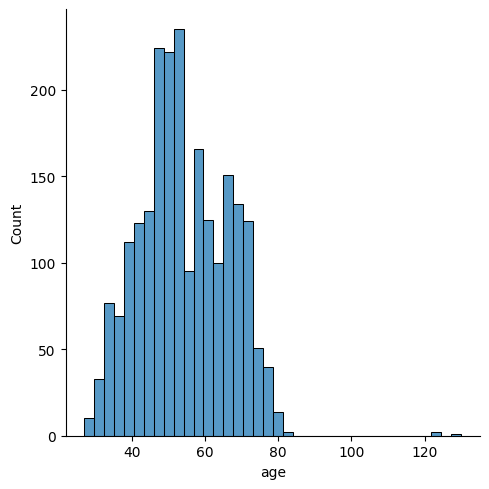

In [8]:
df['year']=2023
df['age']=df['year']-df['Year_Birth']
sns.displot(df['age']);
#there are some outliers here (customers age>120),needs to drop them.Obviously this is a old dataset but not sure when it's published

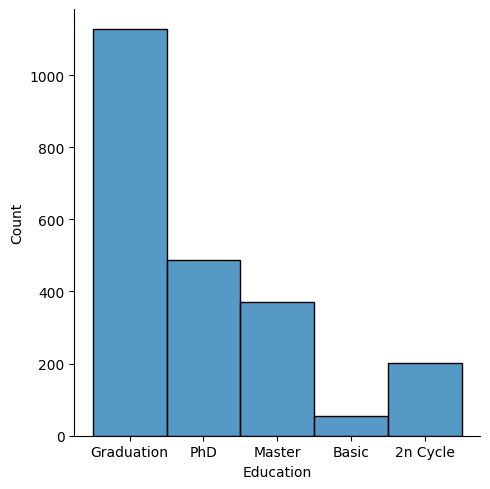

In [9]:
sns.displot(df['Education']);
#most customers education level is graduation, consider map the graduation level to 'undergraduate' and 'post graduate'

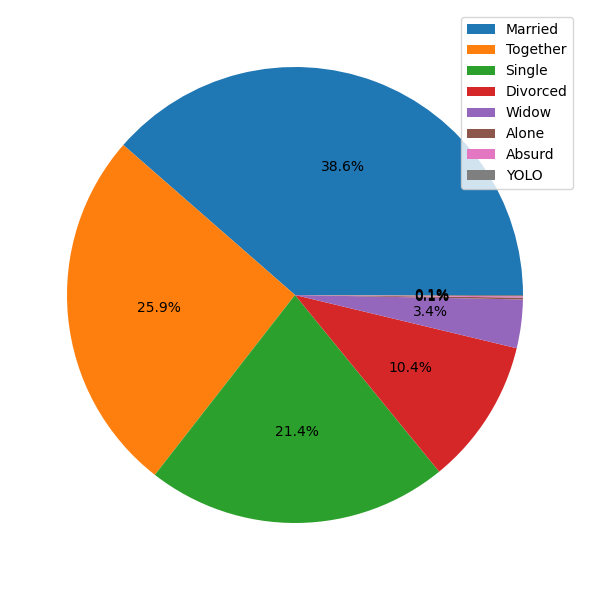

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
labels=df['Marital_Status'].value_counts().index
plt.pie(df['Marital_Status'].value_counts(),autopct='%1.1f%%')
plt.legend(labels)
plt.tight_layout();
#most customers have a relationship(married/together),consider map it to relationship/single

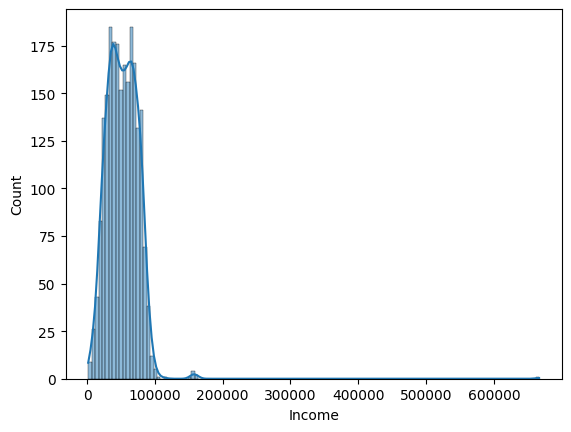

In [11]:
# Histogram on Income
sns.histplot(df['Income'],kde=True);
#most of customers' income is below 100000

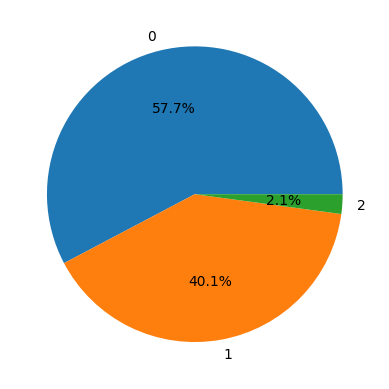

In [12]:
labels=df['Kidhome'].value_counts().index
plt.pie(df['Kidhome'].value_counts(),labels=labels,autopct='%1.1f%%');
#most customers don't have kids home

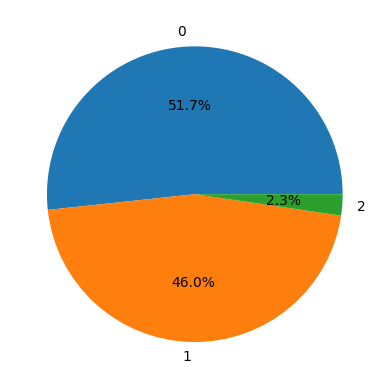

In [13]:
labels=df['Teenhome'].value_counts().index
plt.pie(df['Teenhome'].value_counts(),labels=labels,autopct='%1.1f%%');
#most customers don't have teens home
#consider add-up 'Kidhome' and 'Teenhome' and make a new column'is_parent'

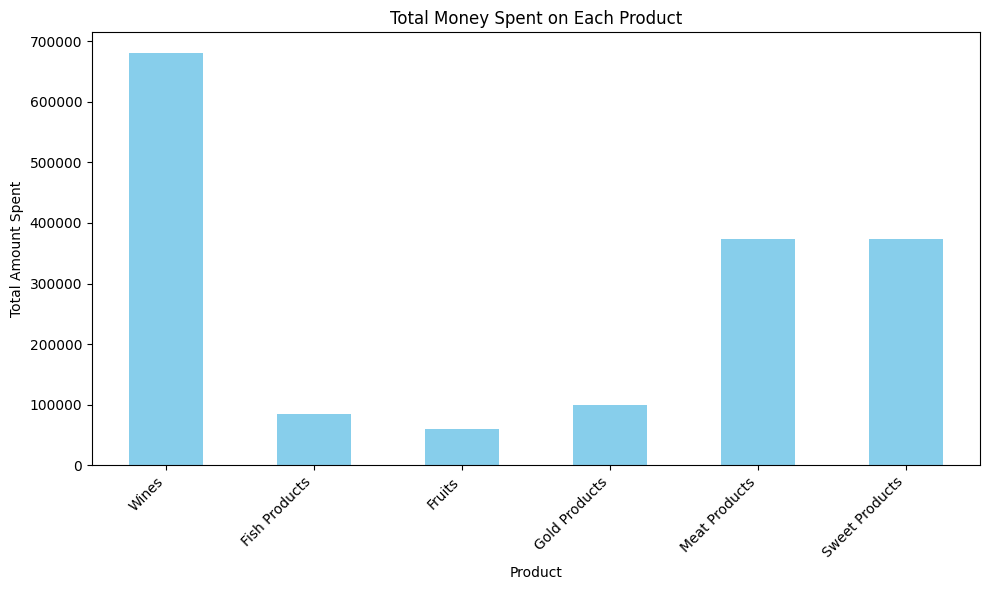

In [14]:
product_sums = {
    'Wines': df['MntWines'].sum(),
    'Fish Products':df['MntFishProducts'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Gold Products': df['MntGoldProds'].sum(),
    'Meat Products': df['MntMeatProducts'].sum(),
    'Sweet Products': df['MntMeatProducts'].sum()
}
product_series = pd.Series(product_sums)
plt.figure(figsize=(10, 6))
product_series.plot(kind='bar',color='skyblue')
plt.title('Total Money Spent on Each Product')
plt.xlabel('Product')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();
#most customers spend their money on wines and meat products

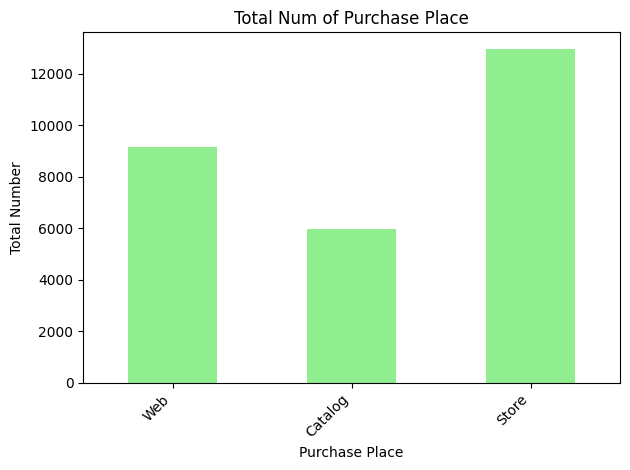

In [15]:
purchase_place_sums = {
    'Web': df['NumWebPurchases'].sum(),
    'Catalog':df['NumCatalogPurchases'].sum(),
    'Store': df['NumStorePurchases'].sum()
}
purchase_place_series = pd.Series(purchase_place_sums)
purchase_place_series.plot(kind='bar',color='lightgreen')
plt.title('Total Num of Purchase Place')
plt.xlabel('Purchase Place')
plt.ylabel('Total Number')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();
#most customer choose to purchase in store.

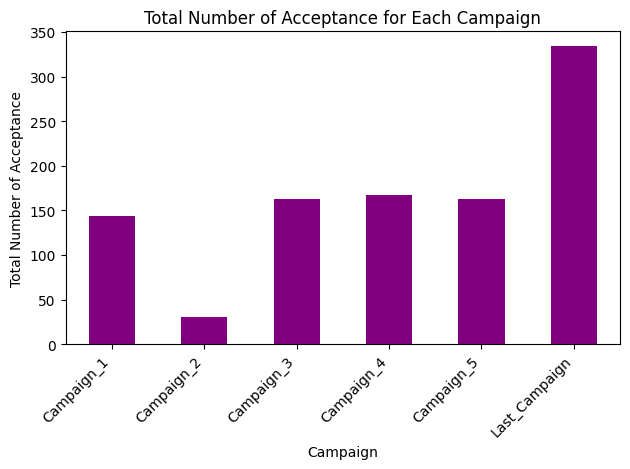

In [16]:
campaign_accepted_sums = {
    'Campaign_1': df['AcceptedCmp1'].sum(),
    'Campaign_2': df['AcceptedCmp2'].sum(),
    'Campaign_3': df['AcceptedCmp3'].sum(),
    'Campaign_4': df['AcceptedCmp4'].sum(),
    'Campaign_5': df['AcceptedCmp5'].sum(),
    'Last_Campaign':df['Response'].sum()
}
product_series = pd.Series(campaign_accepted_sums)
product_series.plot(kind='bar',color='purple')
plt.title('Total Number of Acceptance for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Total Number of Acceptance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();
#Campaign_2 is not successful compare with other campaigns,last campaign is the most successful one

In [17]:
df_copy=df.copy()
df_copy['child_home']=df_copy['Kidhome']+df_copy['Teenhome']
df_copy['child_home'] = df_copy['child_home'].map(lambda x: 1 if x != 0 else 0)
func1 = {'Married':'Relationship', 'Together': 'Relationship', 'Single':'Single','Divorced':'Single', 'Widow':'Single', 'Alone':'Single', 'Absurd':'Single', 'Yolo':'Single'}
df_copy['Marital_Status']=df_copy['Marital_Status'].map(func1)
func2={'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Undergraduate','Master':'Postgraduate','PhD':'Postgraduate'}
df_copy['Education']=df_copy['Education'].map(func2)
df_copy.drop(['Kidhome','Teenhome','Year_Birth','year'],axis=1,inplace=True)
df_copy.rename({'child_home':'is_parent'},axis=1,inplace=True)
df_copy.head()

ID      Education Marital_Status   Income Dt_Customer  Recency  MntWines  \
0  5524  Undergraduate         Single  58138.0  04-09-2012       58       635   
1  2174  Undergraduate         Single  46344.0  08-03-2014       38        11   
2  4141  Undergraduate   Relationship  71613.0  21-08-2013       26       426   
3  6182  Undergraduate   Relationship  26646.0  10-02-2014       26        11   
4  5324   Postgraduate   Relationship  58293.0  19-01-2014       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0         88              546              172  ...                  7   
1          1                6                2  ...                  5   
2         49              127              111  ...                  4   
3          4               20               10  ...                  6   
4         43              118               46  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  age  is_parent  
0         0         1   66          0  
1         0         0   69          1  
2         0         0   58          0  
3         0         0   39          1  
4         0         0   42          1  

[5 rows x 26 columns]

## Data Prepocessing

In [18]:
df_copy.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age',
       'is_parent'],
      dtype='object')

In [19]:
df_copy.describe()

ID         Income      Recency     MntWines    MntFruits  \
count   2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821   52247.251354    49.109375   303.935714    26.302232   
std     3246.662198   25173.076661    28.962453   336.597393    39.773434   
min        0.000000    1730.000000     0.000000     0.000000     0.000000   
25%     2828.250000   35303.000000    24.000000    23.750000     1.000000   
50%     5458.500000   51381.500000    49.000000   173.500000     8.000000   
75%     8427.750000   68522.000000    74.000000   504.250000    33.000000   
max    11191.000000  666666.000000    99.000000  1493.000000   199.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2240.000000      2240.000000       2240.000000   2240.000000   
mean        166.950000        37.525446         27.062946     44.021875   
std         225.715373        54.628979         41.280498     52.167439   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          67.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.000000     56.000000   
max        1725.000000       259.000000        263.000000    362.000000   

       NumDealsPurchases  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean            2.325000  ...           5.316518      0.072768      0.074554   
std             1.932238  ...           2.426645      0.259813      0.262728   
min             0.000000  ...           0.000000      0.000000      0.000000   
25%             1.000000  ...           3.000000      0.000000      0.000000   
50%             2.000000  ...           6.000000      0.000000      0.000000   
75%             3.000000  ...           7.000000      0.000000      0.000000   
max            15.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2240.000000   2240.000000   2240.000000  2240.000000  2240.000000   
mean       0.072768      0.064286      0.013393     0.009375     0.149107   
std        0.259813      0.245316      0.114976     0.096391     0.356274   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               age    is_parent  
count  2240.000000  2240.000000  
mean     54.194196     0.715179  
std      11.984069     0.451430  
min      27.000000     0.000000  
25%      46.000000     0.000000  
50%      53.000000     1.000000  
75%      64.000000     1.000000  
max     130.000000     1.000000  

[8 rows x 23 columns]

In [20]:
df_copy.info()
#2 null values in Marital_Status
#28 null values in Income
#drop the null values since it's only (28+2)/2230=1.3% of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2238 non-null   object 
 3   Income               2216 non-null   float64
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [21]:
df_copy.dropna(inplace=True)
df_copy[df_copy['age']>120].index
df_copy[df_copy['Income']>200000].index

Int64Index([2233], dtype='int64')

In [22]:
df_copy.drop(index=[192,239,339,2233],inplace=True)#index for age>120 rows
df_copy.describe()

ID         Income      Recency     MntWines    MntFruits  \
count   2210.000000    2210.000000  2210.000000  2210.000000  2210.000000   
mean    5584.955204   51962.002262    49.061086   305.272398    26.350679   
std     3245.039709   21536.760214    28.923063   337.475234    39.755837   
min        0.000000    1730.000000     0.000000     0.000000     0.000000   
25%     2817.750000   35208.500000    24.000000    24.000000     2.000000   
50%     5454.500000   51381.500000    49.000000   174.500000     8.000000   
75%     8417.500000   68487.000000    74.000000   505.000000    33.000000   
max    11191.000000  162397.000000    99.000000  1493.000000   199.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2210.000000      2210.000000       2210.000000   2210.000000   
mean        167.135747        37.679186         27.068326     43.927602   
std         224.328327        54.787459         41.103215     51.730350   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          68.000000        12.000000          8.000000     24.000000   
75%         232.750000        50.000000         33.000000     56.000000   
max        1725.000000       259.000000        262.000000    321.000000   

       NumDealsPurchases  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2210.000000  ...        2210.000000   2210.000000   2210.000000   
mean            2.322172  ...           5.319005      0.073756      0.074208   
std             1.923693  ...           2.425355      0.261432      0.262169   
min             0.000000  ...           0.000000      0.000000      0.000000   
25%             1.000000  ...           3.000000      0.000000      0.000000   
50%             2.000000  ...           6.000000      0.000000      0.000000   
75%             3.000000  ...           7.000000      0.000000      0.000000   
max            15.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2    Complain     Response  \
count   2210.000000   2210.000000   2210.000000  2210.00000  2210.000000   
mean       0.072851      0.064253      0.013575     0.00905     0.150226   
std        0.259950      0.245259      0.115743     0.09472     0.357374   
min        0.000000      0.000000      0.000000     0.00000     0.000000   
25%        0.000000      0.000000      0.000000     0.00000     0.000000   
50%        0.000000      0.000000      0.000000     0.00000     0.000000   
75%        0.000000      0.000000      0.000000     0.00000     0.000000   
max        1.000000      1.000000      1.000000     1.00000     1.000000   

               age    is_parent  
count  2210.000000  2210.000000  
mean     54.090045     0.714027  
std      11.706248     0.451979  
min      27.000000     0.000000  
25%      46.000000     0.000000  
50%      53.000000     1.000000  
75%      64.000000     1.000000  
max      83.000000     1.000000  

[8 rows x 23 columns]

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2210 non-null   int64  
 1   Education            2210 non-null   object 
 2   Marital_Status       2210 non-null   object 
 3   Income               2210 non-null   float64
 4   Dt_Customer          2210 non-null   object 
 5   Recency              2210 non-null   int64  
 6   MntWines             2210 non-null   int64  
 7   MntFruits            2210 non-null   int64  
 8   MntMeatProducts      2210 non-null   int64  
 9   MntFishProducts      2210 non-null   int64  
 10  MntSweetProducts     2210 non-null   int64  
 11  MntGoldProds         2210 non-null   int64  
 12  NumDealsPurchases    2210 non-null   int64  
 13  NumWebPurchases      2210 non-null   int64  
 14  NumCatalogPurchases  2210 non-null   int64  
 15  NumStorePurchases    2210 non-null   i

## **Single Variable Investigation**

EDA for expenses of wines since customers spent the most money on it. We can do the same for meat and sweet products. But I am only doing wines here

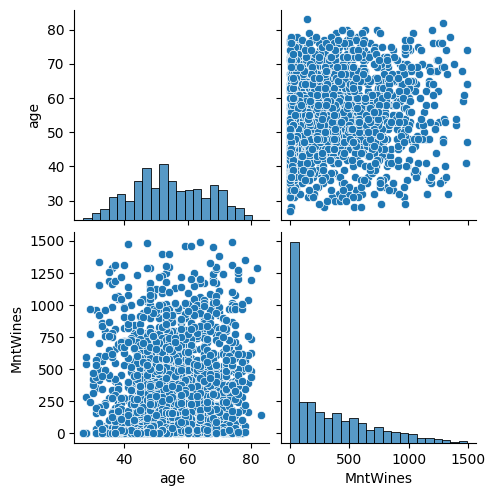

In [24]:
sns.pairplot(df_copy[['age','MntWines']]);
#all age group customers love wines!

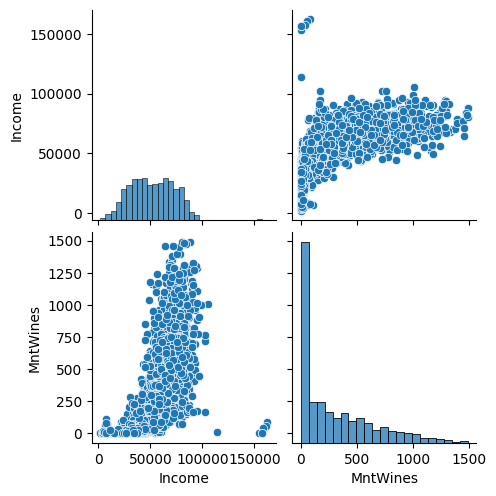

In [25]:
sns.pairplot(df_copy[['Income','MntWines']]);
#Customers whoes income below 20000(mostly below 10000) spent the most on wines,

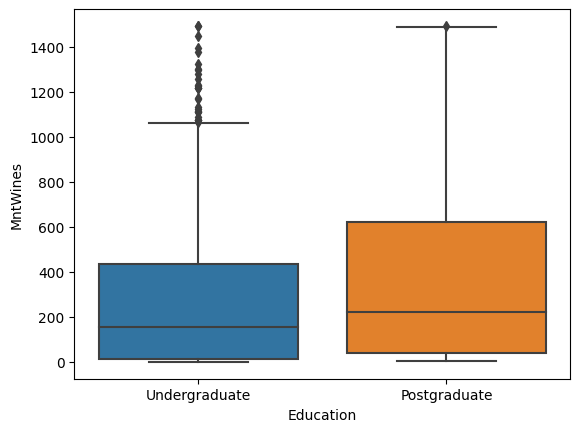

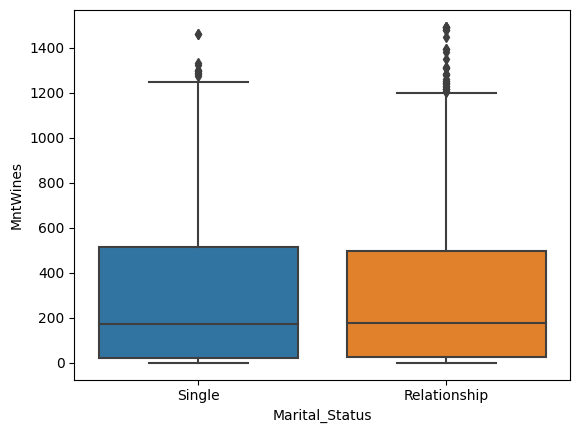

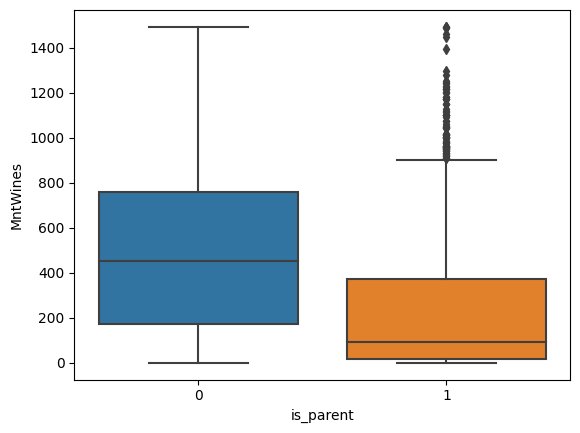

In [26]:
var=['Education','Marital_Status','is_parent']
for item in var:
    sns.boxplot(data=df_copy,x=item,y="MntWines")
    plt.show();
    #post graduate customers spend a bit more on wines than undergraduate
    #Marital status doesn't really affect customers' expenses on wines
    #Customers with no kids spend on wines way more than customers with kids

In [27]:
df_copy['Total_Expenses_on_products']=df_copy['MntWines']+df_copy['MntFruits']+df_copy['MntMeatProducts']+df_copy['MntFishProducts']+df_copy['MntSweetProducts']+df_copy[ 'MntGoldProds']
df_copy['total_accepted_campaigns']=df_copy['AcceptedCmp1']+df_copy['AcceptedCmp2']+df_copy['AcceptedCmp3']+df_copy['AcceptedCmp4']+df_copy['AcceptedCmp5']
df_copy.shape

(2210, 28)

# Customer segmentation analysis

Based on customers''age','Education','Marital_Status','Income','is_parent','Total_Expenses_on_products','total_accepted_campaigns','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'

In [28]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
X1=df_copy[['age','Education','Marital_Status','Income','is_parent','Total_Expenses_on_products','total_accepted_campaigns','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
num_var1=['age','Income','Total_Expenses_on_products','total_accepted_campaigns','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
#use StandScaler since it's less sensitive to outliers, there are some outliers in income
cat_var1=['Education','Marital_Status','is_parent']#onehotencoder
pipe_cat1=Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore'))])
pipe_num1=Pipeline([('scale',StandardScaler())])
pipe_full=ColumnTransformer([('cat',pipe_cat1,cat_var1),('num',pipe_num1,num_var1)])
X1_trans=pipe_full.fit_transform(X1)
X1_trans

array([[ 0.        ,  1.        ,  0.        , ...,  1.42790912,
         2.50232803, -0.55551   ],
       [ 0.        ,  1.        ,  0.        , ..., -1.12552448,
        -0.5716825 , -1.17057869],
       [ 0.        ,  1.        ,  1.        , ...,  1.42790912,
        -0.23012578,  1.28969606],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.76074825,
         0.11143095,  2.2122991 ],
       [ 1.        ,  0.        ,  1.        , ...,  0.69835666,
         0.7945444 ,  1.28969606],
       [ 1.        ,  0.        ,  1.        , ..., -0.39597202,
        -0.5716825 , -0.55551   ]])

In [29]:
pipe_full.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education', 'Marital_Status', 'is_parent']),
                                ('num',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 ['age', 'Income', 'Total_Expenses_on_products',
                                  'total_accepted_campaigns',
                                  'NumDealsPurchases', 'NumWebPurchases',
                                  'NumCatalogPurchases',
                                  'NumStorePurchases'])])>

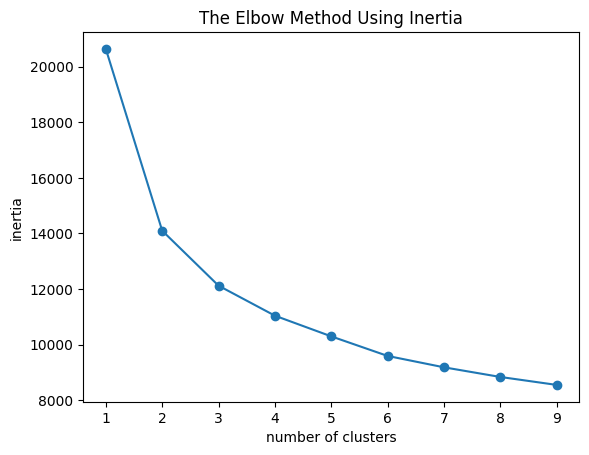

In [30]:
#this is to try using inertias(silhouette_score) to find optimum number of cluster
def optimize_k_means_with_inertias(data,max_k):
  means=[]
  inertias=[]
  for k in range(1,max_k):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)
  plt.plot(means,inertias,'o-')
  plt.xlabel("number of clusters")
  plt.ylabel("inertia")
  plt.title("The Elbow Method Using Inertia")
  plt.show();
optimize_k_means_with_inertias(X1_trans,10)

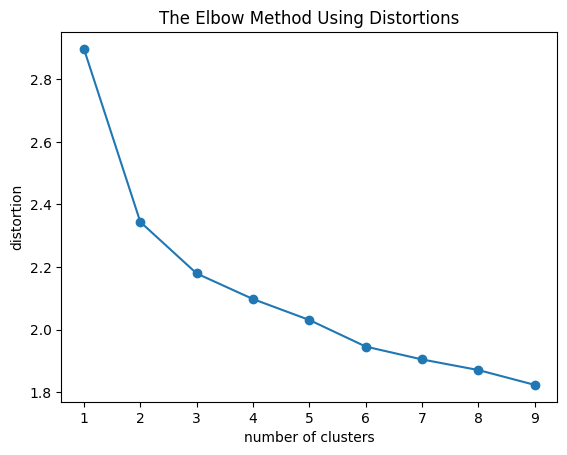

In [31]:
from scipy.spatial.distance import cdist
def optimize_k_means_with_distortion(data,max_k):
  means=[]
  distortion=[]
  for k in range(1,max_k):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    distortion.append(sum(np.min(cdist(data,kmeans.cluster_centers_,'euclidean'),axis=1))/data.shape[0])
  plt.plot(means,distortion,'o-')
  plt.xlabel("number of clusters")
  plt.ylabel("distortion")
  plt.title("The Elbow Method Using Distortions")
  plt.show();
optimize_k_means_with_distortion(X1_trans,10)


In [32]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
kmeans_model= KMeans(n_clusters=2).fit(X1_trans)
labels=kmeans_model.labels_
metrics.silhouette_score(X1_trans,labels,metric='euclidean')

0.30571444321976116

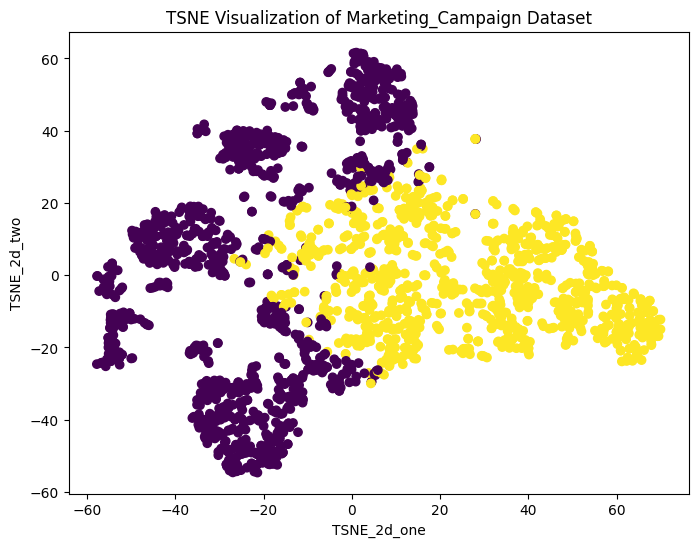

In [33]:
pred=kmeans_model.predict(X1_trans)
from sklearn.manifold import TSNE
reducers=TSNE(n_components=2)
X_reduced=reducers.fit_transform(X1_trans)
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=pred)
plt.title('TSNE Visualization of Marketing_Campaign Dataset')
plt.xlabel('TSNE_2d_one')
plt.ylabel('TSNE_2d_two')
plt.show();


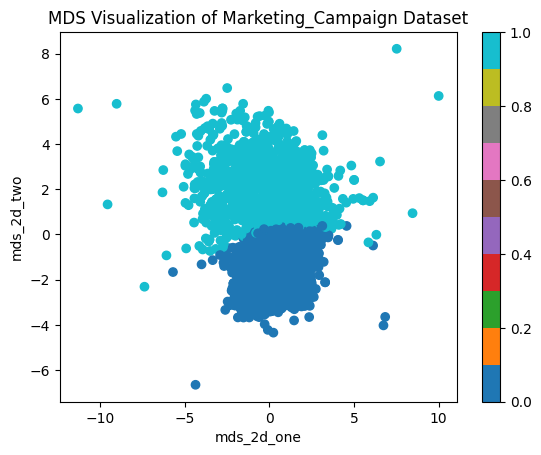

In [34]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
mds=MDS(n_components=2)
X_mds = mds.fit_transform(X1_trans)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=pred, cmap='tab10')
plt.colorbar()
plt.title('MDS Visualization of Marketing_Campaign Dataset')
plt.xlabel('mds_2d_one')
plt.ylabel('mds_2d_two')
plt.show();
#well grouped, this is a better clustering visualization than TNSE

In [35]:
df_cluster=pd.DataFrame(X1_trans)
df_cluster.rename({0:'post_grad',1:'under_grad',2:'Relationship',3:'Single',4:'No_child',5:'has_child',6:'age',7:'income',8:'total_expenses',9:'total_campgn_accepted',10:'NumDealsPurchases',11:'NumWebPurchases',12:'NumCatalogPurchases',13:'NumStorePurchases'},axis=1,inplace=True)
df_cluster['group']=pred
df_cluster.head()

post_grad  under_grad  Relationship  Single  No_child  has_child       age  \
0        0.0         1.0           0.0     1.0       1.0        0.0  1.017632   
1        0.0         1.0           0.0     1.0       0.0        1.0  1.273963   
2        0.0         1.0           1.0     0.0       1.0        0.0  0.334081   
3        0.0         1.0           1.0     0.0       0.0        1.0 -1.289351   
4        1.0         0.0           1.0     0.0       0.0        1.0 -1.033019   

     income  total_expenses  total_campgn_accepted  NumDealsPurchases  \
0  0.286830        1.675282              -0.439397           0.352437   
1 -0.260915       -0.963177              -0.439397          -0.167514   
2  0.912646        0.279720              -0.439397          -0.687465   
3 -1.175745       -0.920032              -0.439397          -0.167514   
4  0.294029       -0.307711              -0.439397           1.392340   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  group  
0         1.427909             2.502328          -0.555510      1  
1        -1.125524            -0.571683          -1.170579      0  
2         1.427909            -0.230126           1.289696      1  
3        -0.760748            -0.913239          -0.555510      0  
4         0.333580             0.111431           0.059559      0

In [36]:
df_cluster.groupby('group').mean()


post_grad  under_grad  Relationship    Single  No_child  has_child  \
group                                                                       
0       0.356964    0.643036      0.657214  0.342786  0.118432   0.881568   
1       0.410485    0.589515      0.633037  0.366963  0.484669   0.515331   

            age    income  total_expenses  total_campgn_accepted  \
group                                                              
0     -0.167322 -0.707746       -0.773405              -0.313004   
1      0.198436  0.839354        0.917223               0.371208   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
group                                                            
0              -0.002291        -0.561475            -0.661416   
1               0.002718         0.665884             0.784409   

       NumStorePurchases  
group                     
0              -0.677087  
1               0.802995

**Group 0**: has child,young,low income, low expense,low accepted campaign,low web purchase/catalog purchase/store purchase,high deals purchases

**Group 1**: no kid,older,high income,high expense,high accepter campaign,high web purchase/catalog purchase/store purchase,low deals purchases

In [37]:
df_cluster.groupby('group').count()

post_grad  under_grad  Relationship  Single  No_child  has_child   age  \
group                                                                           
0           1199        1199          1199    1199      1199       1199  1199   
1           1011        1011          1011    1011      1011       1011  1011   

       income  total_expenses  total_campgn_accepted  NumDealsPurchases  \
group                                                                     
0        1199            1199                   1199               1199   
1        1011            1011                   1011               1011   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
group                                                           
0                 1199                 1199               1199  
1                 1011                 1011               1011

In [38]:
df_copy[['age','Education','Marital_Status','Income','is_parent','Total_Expenses_on_products','total_accepted_campaigns']]['Marital_Status'].value_counts()
#in dataset, 61% are undergrad,39% are postgrad,64% are in relationship,36% are single, these percentages are for identifying the groups

Relationship    1428
Single           782
Name: Marital_Status, dtype: int64

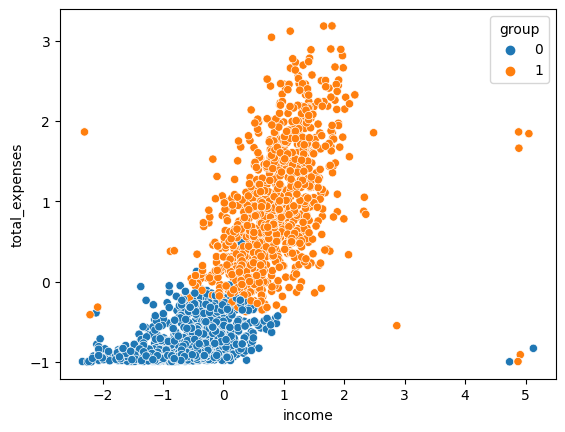

In [39]:
sns.scatterplot(data=df_cluster,x=df_cluster['income'],y=df_cluster['total_expenses'],hue=df_cluster['group']);

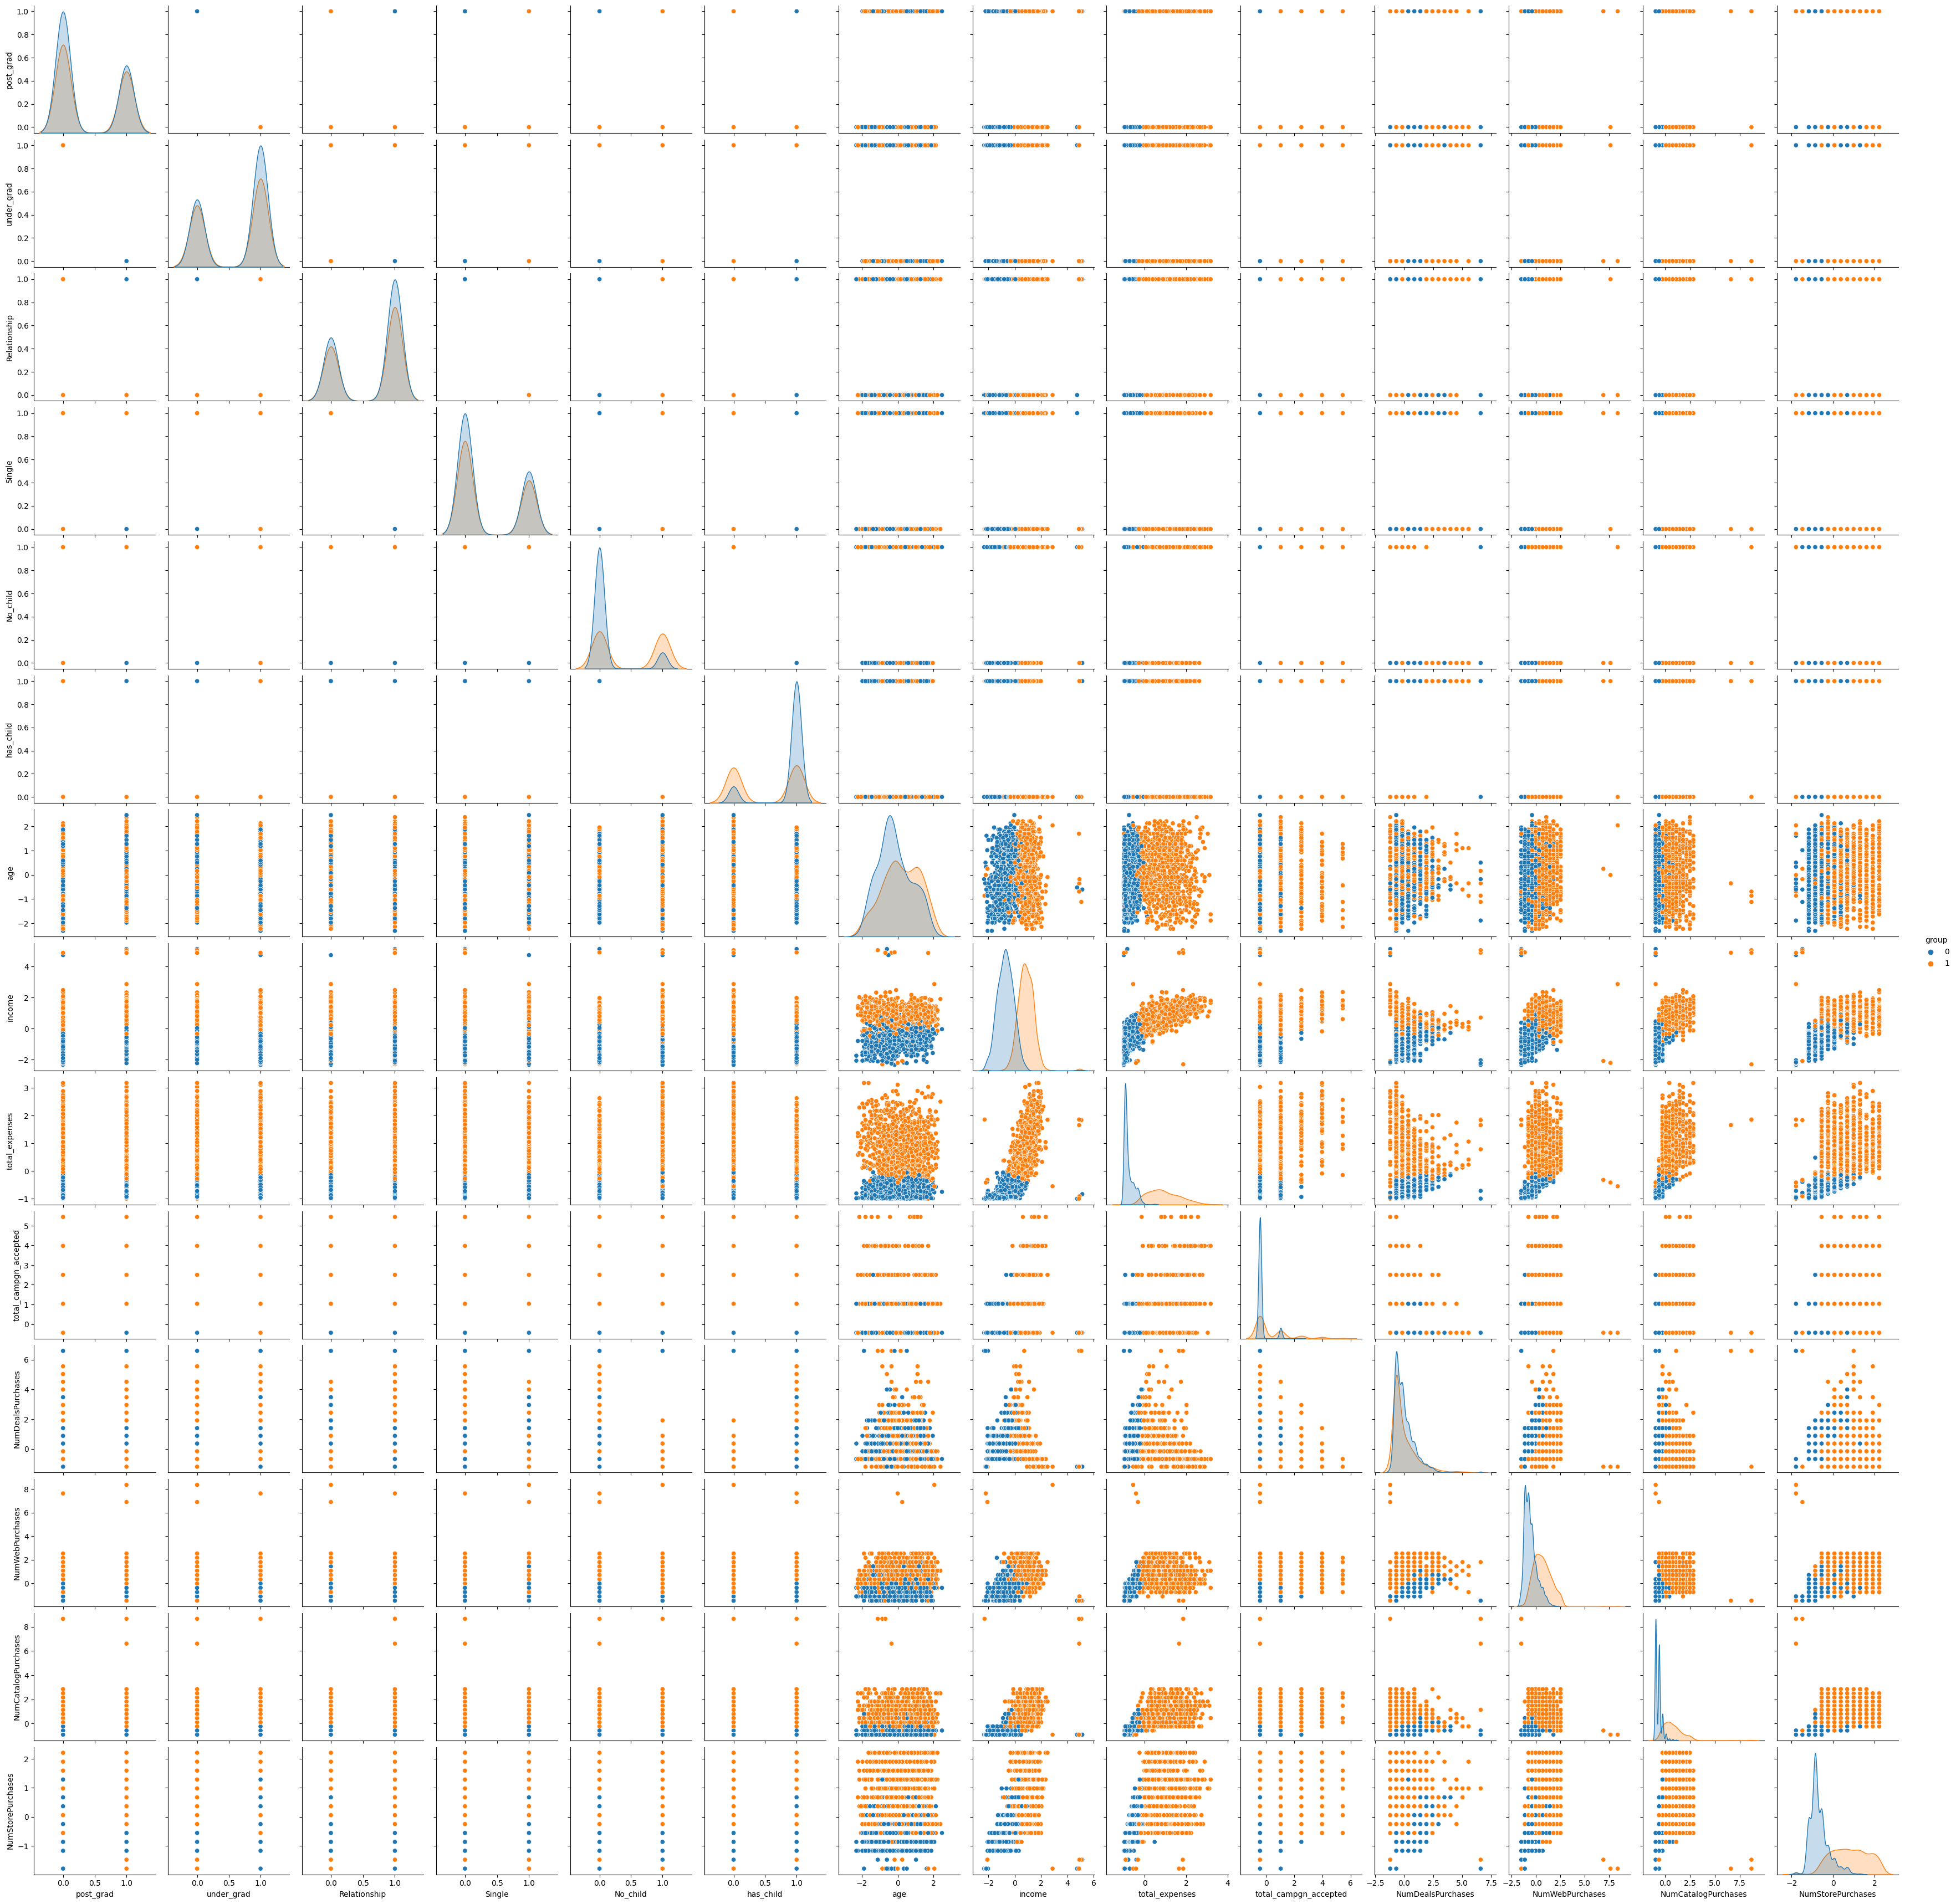

In [40]:
sns.pairplot(data=df_cluster,hue='group');

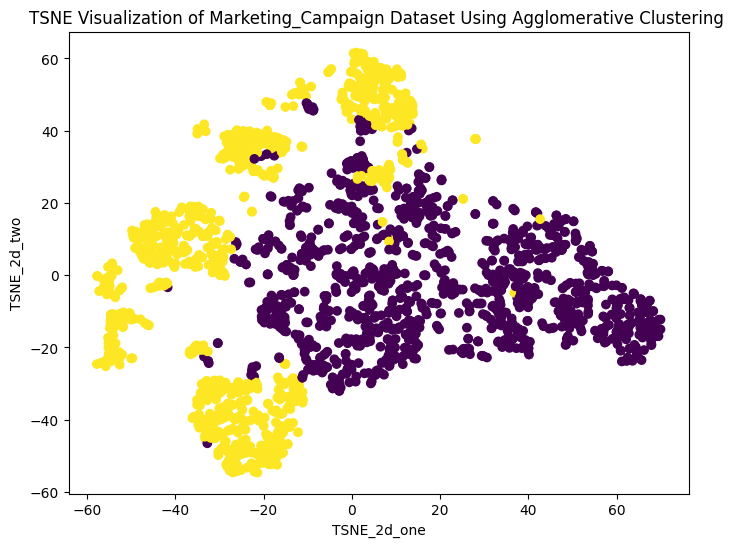

In [41]:
 #AgglomerativeClustering can handle non-spherical and differently sized clusters and
 #does not require the user to specify the number of clusters beforehand.
 #However, it is slower and more computationally complex than KMeans clustering
 #from tsne and mds visualization, we can see the clusters are non-spherical, that's why I'm trying Agglomerative Clustering here
 from sklearn.cluster import AgglomerativeClustering
 from sklearn.manifold import TSNE
 agg_model= AgglomerativeClustering(affinity='euclidean',linkage='ward')
 agg_pred=agg_model.fit_predict(X1_trans)
 reducers=TSNE(n_components=2)
 X_reduced=reducers.fit_transform(X1_trans)
 fig = plt.figure(figsize=(8, 6))
 plt.scatter(X_reduced[:,0],X_reduced[:,1],c=agg_pred)
 plt.title('TSNE Visualization of Marketing_Campaign Dataset Using Agglomerative Clustering ')
 plt.xlabel('TSNE_2d_one')
 plt.ylabel('TSNE_2d_two')
 plt.show();

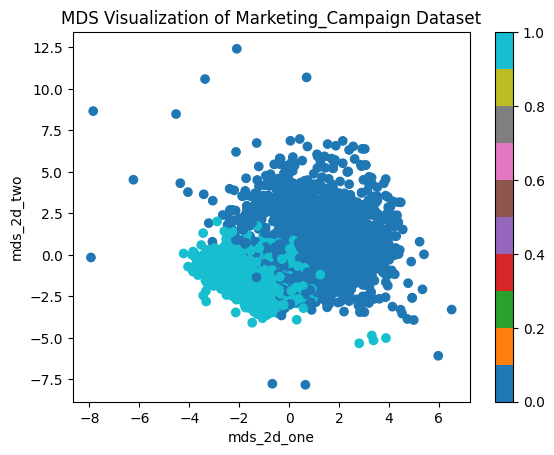

In [42]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
mds=MDS(n_components=2)
X_mds = mds.fit_transform(X1_trans)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=agg_pred, cmap='tab10')
plt.colorbar()
plt.title('MDS Visualization of Marketing_Campaign Dataset')
plt.xlabel('mds_2d_one')
plt.ylabel('mds_2d_two')
plt.show();
#clusters are tight and close with each other, consider use distortion score to identify the optimum cluster

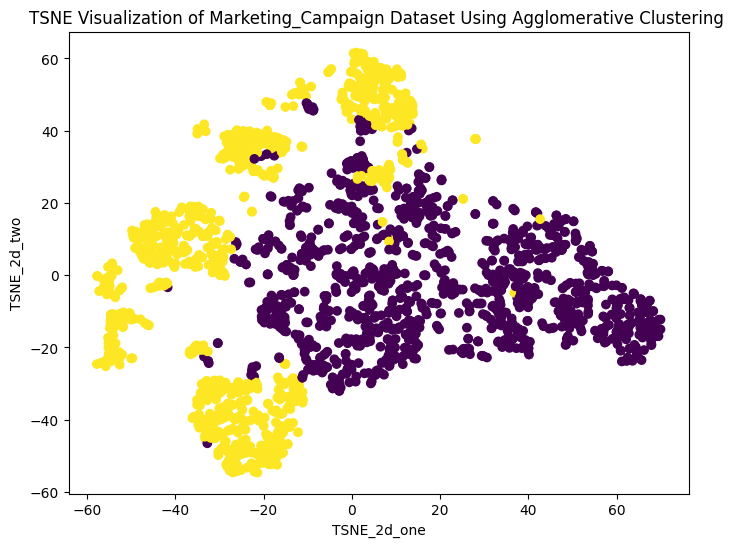

In [43]:
 #AgglomerativeClustering can handle non-spherical and differently sized clusters and
 #does not require the user to specify the number of clusters beforehand.
 #However, it is slower and more computationally complex than KMeans clustering
 #from tsne and mds visualization, we can see the clusters are non-spherical, that's why I'm trying Agglomerative Clustering here
 from sklearn.cluster import AgglomerativeClustering
 from sklearn.manifold import TSNE
 agg_model= AgglomerativeClustering(affinity='euclidean',linkage='ward')
 agg_pred=agg_model.fit_predict(X1_trans)
 reducers=TSNE(n_components=2)
 X_reduced=reducers.fit_transform(X1_trans)
 fig = plt.figure(figsize=(8, 6))
 plt.scatter(X_reduced[:,0],X_reduced[:,1],c=agg_pred)
 plt.title('TSNE Visualization of Marketing_Campaign Dataset Using Agglomerative Clustering ')
 plt.xlabel('TSNE_2d_one')
 plt.ylabel('TSNE_2d_two')
 plt.show();

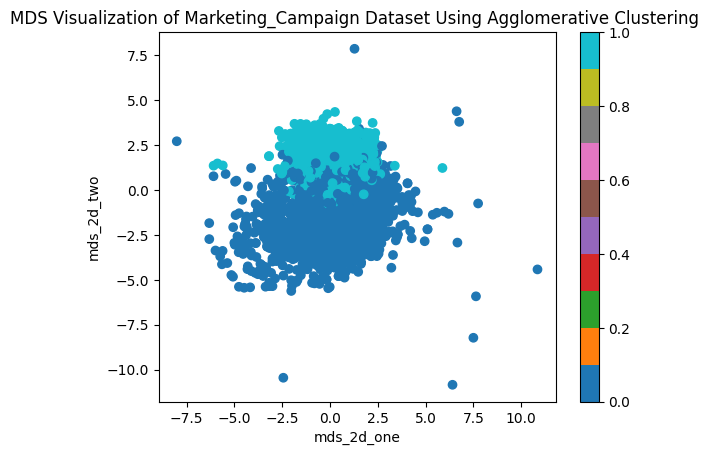

In [44]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
mds=MDS(n_components=2)
X_mds = mds.fit_transform(X1_trans)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=agg_pred, cmap='tab10')
plt.colorbar()
plt.title('MDS Visualization of Marketing_Campaign Dataset Using Agglomerative Clustering ')
plt.xlabel('mds_2d_one')
plt.ylabel('mds_2d_two')
plt.show();
#clusters are tight and close with each other, consider use distortion score to identify the optimum cluster

In [45]:
agg_model= AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
agg_pred=agg_model.fit_predict(X1_trans)
df_agg_cluster=pd.DataFrame(X1_trans)
df_agg_cluster.rename({0:'post_grad',1:'under_grad',2:'Relationship',3:'Single',4:'No_child',5:'has_child',6:'age',7:'income',8:'total_expenses',9:'total_campgn_accepted',10:'NumDealsPurchases',11:'NumWebPurchases',12:'NumCatalogPurchases',13:'NumStorePurchases'},axis=1,inplace=True)
df_agg_cluster['group']=agg_pred
df_agg_cluster.head()

post_grad  under_grad  Relationship  Single  No_child  has_child       age  \
0        0.0         1.0           0.0     1.0       1.0        0.0  1.017632   
1        0.0         1.0           0.0     1.0       0.0        1.0  1.273963   
2        0.0         1.0           1.0     0.0       1.0        0.0  0.334081   
3        0.0         1.0           1.0     0.0       0.0        1.0 -1.289351   
4        1.0         0.0           1.0     0.0       0.0        1.0 -1.033019   

     income  total_expenses  total_campgn_accepted  NumDealsPurchases  \
0  0.286830        1.675282              -0.439397           0.352437   
1 -0.260915       -0.963177              -0.439397          -0.167514   
2  0.912646        0.279720              -0.439397          -0.687465   
3 -1.175745       -0.920032              -0.439397          -0.167514   
4  0.294029       -0.307711              -0.439397           1.392340   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  group  
0         1.427909             2.502328          -0.555510      0  
1        -1.125524            -0.571683          -1.170579      1  
2         1.427909            -0.230126           1.289696      0  
3        -0.760748            -0.913239          -0.555510      1  
4         0.333580             0.111431           0.059559      0

In [46]:
df_agg_cluster.groupby('group').mean()

post_grad  under_grad  Relationship    Single  No_child  has_child  \
group                                                                       
0       0.390185    0.609815      0.666130  0.333870  0.391794   0.608206   
1       0.370217    0.629783      0.620476  0.379524  0.149948   0.850052   

            age    income  total_expenses  total_campgn_accepted  \
group                                                              
0      0.199007  0.607871        0.651058               0.266076   
1     -0.255808 -0.781369       -0.836882              -0.342019   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
group                                                            
0               0.208541         0.577449             0.562352   
1              -0.268063        -0.742264            -0.722858   

       NumStorePurchases  
group                     
0               0.596445  
1              -0.766681

**Group 0**: undergrad ,in relationship/single,has child,young,low income, low expense,low accepted campaign,low web purchase/catalog purchase/store purchase,high deals purchases**--kmeans**

**Group 0**: undergrad/postgrad ,in relationship,no child,older,high income, high expense,high accepted campaign,high web purchase/catalog purchase/store purchase,high deals purchases**--agg**

**Group 1**: postgrad,in relationship/single,no kid,older,high income,high expense,high accepter campaign,high web purchase/catalog purchase/store purchase,low deals purchases**--kmeans**

**Group 1**: undergrad ,single,has child,younger,low income, low expense,low accepted campaign,low web purchase/catalog purchase/store purchase,high deals purchases**--agg**

# Prediction Model #

## Feature Engineering & Data Pre-Processing for Prediction Model ##

In [28]:
df_copy_pred=df.copy() # Making a new copy of the dataframe

In [29]:
df_copy_pred.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'year', 'age'],
      dtype='object')

In [30]:
df_copy_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [31]:
df_copy_pred.dropna(inplace=True)
df_copy_pred[df_copy_pred['age']>120].index # Removing outlier age
df_copy_pred[df_copy_pred['Income']>200000].index # Removimg outlier Income

Int64Index([2233], dtype='int64')

In [32]:
df_copy_pred.drop(index=[192,239,339,2233],inplace=True)#index for age>120 rows
df_copy_pred.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2212.000000  2212.000000    2212.000000  2212.000000  2212.000000   
mean    5585.160940  1968.913653   51958.810579     0.441682     0.505877   
std     3247.523735    11.701599   21527.278844     0.536955     0.544253   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35233.500000     0.000000     0.000000   
50%     5454.500000  1970.000000   51371.000000     0.000000     0.000000   
75%     8418.500000  1977.000000   68487.000000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2212.000000  2212.000000  2212.000000      2212.000000   
mean     49.019439   305.287523    26.329566       167.029837   
std      28.943121   337.322940    39.744052       224.254493   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   175.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2212.000000  ...        2212.000000   2212.000000   2212.000000   
mean         37.648734  ...           5.321429      0.073689      0.074141   
std          54.772033  ...           2.425597      0.261323      0.262060   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2212.000000   2212.000000   2212.000000  2212.000000  2212.000000   
mean       0.072785      0.064195      0.013562     0.009042     0.150542   
std        0.259842      0.245156      0.115691     0.094678     0.357683   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

         year          age  
count  2212.0  2212.000000  
mean   2023.0    54.086347  
std       0.0    11.701599  
min    2023.0    27.000000  
25%    2023.0    46.000000  
50%    2023.0    53.000000  
75%    2023.0    64.000000  
max    2023.0    83.000000  

[8 rows x 26 columns]

In [33]:
df_copy_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

Add a new feature ***Customer_since*** based on **Dt_Customer** to be number of months since the customer is enrolled with the company

Add a new feature **age** based on **Year_Birth**

In [34]:
import datetime
df_copy_pred['Dt_Customer'] = pd.to_datetime(df_copy_pred['Dt_Customer'], errors="coerce")
current_date = datetime.datetime.now()
df_copy_pred['Customer_since']=(current_date - df_copy_pred['Dt_Customer']).dt.days / 30.44 # number of month since customer’s enrolment with the company

In [35]:
df_copy_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

In [36]:
 df_copy_pred.groupby('Response').count()['ID']

Response
0    1879
1     333
Name: ID, dtype: int64

In [37]:
df_copy_pred_fnl = df_copy_pred.copy()

Dropping all Extra columns

In [38]:
df_copy_pred_fnl.drop(labels=['ID','Year_Birth','Dt_Customer','year'],axis=1,inplace=True)

In [39]:
df_copy_pred_fnl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

### Null Analysis ##

In [40]:
null_counts = df_copy_pred_fnl.isnull().sum()
print(null_counts)

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
age                    0
Customer_since         0
dtype: int64


In [41]:
mean_income = df_copy_pred_fnl['Income'].mean()
median_income = df_copy_pred_fnl['Income'].median()
df_copy_pred_fnl['Income'].fillna(mean_income, inplace=True)  # or median_income
df_copy_pred_fnl['Income'].isnull().sum()

0

### Check for Data Imbalance

In [42]:
def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

0    1879
1     333
Name: Response, dtype: int64

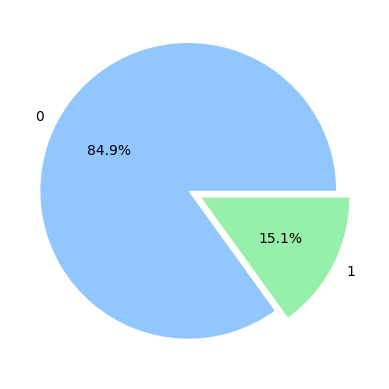

In [43]:
check_data_balance(df_copy_pred_fnl["Response"])

Upon checking for data imbalance, it could be understood that the data is not a completely balanced set as it contains more observations of people who haven't accepted the last campaign offer vs people who have accepted the last campaign offer

## Creating X and y for Predictive Analysis ##




In [44]:
#columns_numerical = ['Income','age', 'Recency', 'MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', 'Cust_Tenure']
#columns_categorical = ['Education','Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Accepted_Any_Cmpgn']

In [46]:
# Sorting variables by datatypes and splitting them into predictor and target variables

TARGET = ['Response']
columns_predictors = [col for col in df_copy_pred_fnl.columns if col not in TARGET]
#columns_numerical = ['Income','age', 'Recency', 'MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', 'Cust_Tenure']
columns_cat_nde = ['Education','Marital_Status']
columns_cat_dnde = ['Kidhome', 'Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain']
columns_numerical = [col for col in columns_predictors if col not in columns_cat_nde if col not in columns_cat_dnde if col not in TARGET]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical_need_encoding: {columns_cat_nde}")
print(f"columns_categorical_dont_need_encoding: {columns_cat_dnde}")
print(f"columns_numerical: {columns_numerical}")

TARGET: ['Response']
columns_predictors: ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'age', 'Customer_since']
columns_categorical_need_encoding: ['Education', 'Marital_Status']
columns_categorical_dont_need_encoding: ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
columns_numerical: ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age', 'Customer_since']


## Select X and y #

In [47]:
X = df_copy_pred_fnl[columns_predictors]
y = df_copy_pred_fnl[TARGET]
y.value_counts()

Response
0           1879
1            333
dtype: int64

## Train Test Split ##

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10086, stratify=y) #stratified sampling based on the target to preserve the overall distribution in our train and test datasets
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1769, 25)
X_test.shape: (443, 25)
y_train.shape: (1769, 1)
y_test.shape: (443, 1)


In [49]:
from IPython.display import display
display(X_train)
display(y_train)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
65    Graduation        Married  25721.0        1         0       75   
1320      Master        Married  81843.0        0         0       13   
373   Graduation         Single  63810.0        0         1       45   
581   Graduation       Together  40689.0        0         1       69   
343          PhD       Together  59292.0        0         1       71   
...          ...            ...      ...      ...       ...      ...   
2048  Graduation         Single  76467.0        1         0       44   
790       Master       Together  62847.0        0         0       45   
1938      Master        Married  34242.0        0         1       25   
237          PhD         Single  79761.0        0         1       32   
26    Graduation        Married  53359.0        1         1        4   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
65           1          3                6                3  ...   
1320       779         86              537               34  ...   
373        977         12              253               16  ...   
581        270          3               27               39  ...   
343        378         14               68               19  ...   
...        ...        ...              ...              ...  ...   
2048       676        161              426              210  ...   
790        521        168              706               80  ...   
1938         8          2                4                0  ...   
237        415          5              124               15  ...   
26         173          4               30                3  ...   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
65                    2                  7             0             0   
1320                 12                  3             0             0   
373                  12                  8             0             1   
581                   5                  8             0             0   
343                   8                  3             0             0   
...                 ...                ...           ...           ...   
2048                  5                  6             0             0   
790                   4                  2             0             0   
1938                  3                  5             0             0   
237                  11                  3             0             0   
26                    4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  age  Customer_since  
65               0             0             0         0   52      122.766097  
1320             0             0             0         0   63      123.718791  
373              0             0             0         0   57      129.040736  
581              0             0             0         0   72      124.868594  
343              0             0             0         0   73      122.010512  
...            ...           ...           ...       ...  ...             ...  
2048             0             0             0         0   53      131.865966  
790              0             0             0         0   78      126.905388  
1938             0             0             0         0   64      112.713535  
237              0             0             0         0   65      124.113009  
26               0             0             0         0   47      122.568988  

[1769 rows x 25 columns]

Response
65           1
1320         0
373          0
581          0
343          0
...        ...
2048         1
790          0
1938         0
237          0
26           0

[1769 rows x 1 columns]

## Pre-processing with Pipelines ##

In [50]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder #specific transformations we want to use in our pipelines

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown="ignore")),
])

pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

pipeline_full = ColumnTransformer([
  ("categorical_nde", pipeline_categorical, columns_cat_nde),
  ("categorical_dnde",'passthrough', columns_cat_dnde),
  ("numerical", pipeline_numerical, columns_numerical)
])


Separate the variables into various buckets namely categorical and numerical and applying ColumnTransformer to merge them.

In [51]:
pipeline_full

ColumnTransformer(transformers=[('categorical_nde',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education', 'Marital_Status']),
                                ('categorical_dnde', 'passthrough',
                                 ['Kidhome', 'Teenhome', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'Complain']),
                                ('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Income', 'Recency', 'MntWines', 'MntFruits',
                                  'MntMeatProducts', 'MntFishProducts',
                                  'MntSweetProducts', 'MntGoldProds',
                                  'NumDealsPurchases', 'NumWebPurchases',
                                  'NumCatalogPurchases', 'NumStorePurchases',
                                  'NumWebVisitsMonth', 'age',
                                  'Customer_since'])])

## Applying the Pipeline ##

In [52]:
X_train_transformed = pipeline_full.fit_transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (1769, 36)
X_test_transformed.shape: (443, 36)


In [53]:
pipeline_full.get_feature_names_out()

array(['categorical_nde__Education_2n Cycle',
       'categorical_nde__Education_Basic',
       'categorical_nde__Education_Graduation',
       'categorical_nde__Education_Master',
       'categorical_nde__Education_PhD',
       'categorical_nde__Marital_Status_Absurd',
       'categorical_nde__Marital_Status_Alone',
       'categorical_nde__Marital_Status_Divorced',
       'categorical_nde__Marital_Status_Married',
       'categorical_nde__Marital_Status_Single',
       'categorical_nde__Marital_Status_Together',
       'categorical_nde__Marital_Status_Widow',
       'categorical_nde__Marital_Status_YOLO',
       'categorical_dnde__Kidhome', 'categorical_dnde__Teenhome',
       'categorical_dnde__AcceptedCmp1', 'categorical_dnde__AcceptedCmp2',
       'categorical_dnde__AcceptedCmp3', 'categorical_dnde__AcceptedCmp4',
       'categorical_dnde__AcceptedCmp5', 'categorical_dnde__Complain',
       'numerical__Income', 'numerical__Recency', 'numerical__MntWines',
       'numerical__MntFru

In [54]:
pipeline_full.named_transformers_["categorical_nde"].get_feature_names_out()

array(['Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'], dtype=object)

In [55]:
pipeline_full.named_transformers_["numerical"].get_feature_names_out()

array(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'age', 'Customer_since'],
      dtype=object)

In [56]:
print(y_train.columns)

Index(['Response'], dtype='object')


In [57]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return conf_matrix, accuracy


## PCA  - Dimensionality Reduction

In [58]:
from sklearn.decomposition import PCA
pca_red = PCA(n_components=0.95)
df_pca_red = pipeline_full.fit_transform(X)

print(df_pca_red.shape)

(2212, 36)


Applying PCA to achieve reduced dimensions resulted in no reduction signifying
that current list of dimensions are already optimized to run the prediction model

## Feature Selection

In [59]:
# Importing Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

Using Random Forest Classifier to determine Item Importance

In [60]:
rfc = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rfc.fit(X=X_train_transformed, y=np.ravel(y_train))

RandomForestClassifier(max_leaf_nodes=16, n_estimators=50, n_jobs=-1)

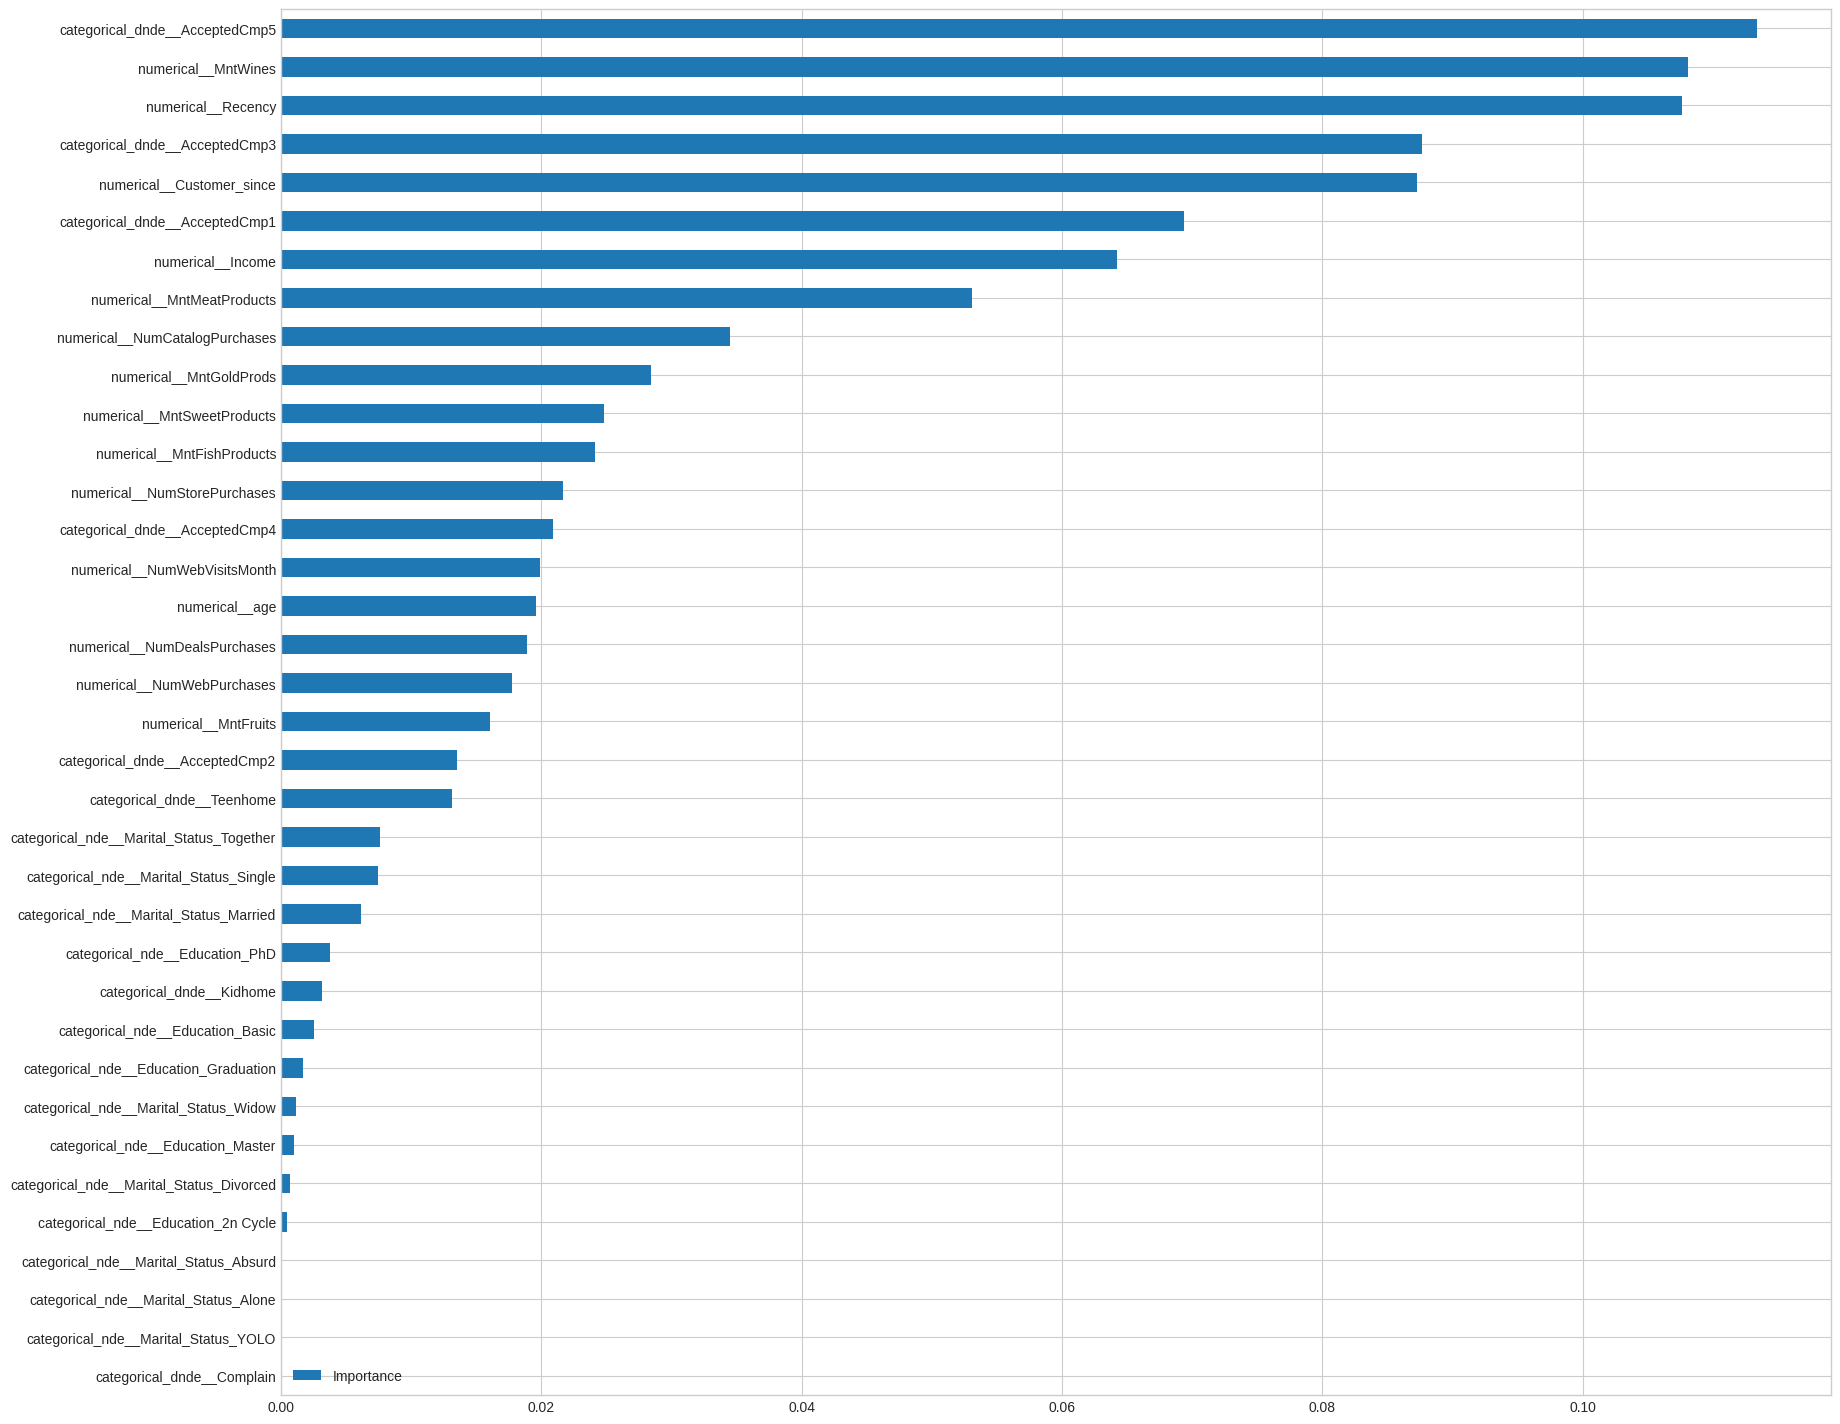

In [61]:
plt.style.use('seaborn-whitegrid')
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=pipeline_full.get_feature_names_out(), columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20, len(importance)/2));

## Analysis of Different Models ##

### Without Hyperparameter Tuning ###

Decision Tree Accuracy: 82.17 %
F1 score of Test set: 0.4475524475524475


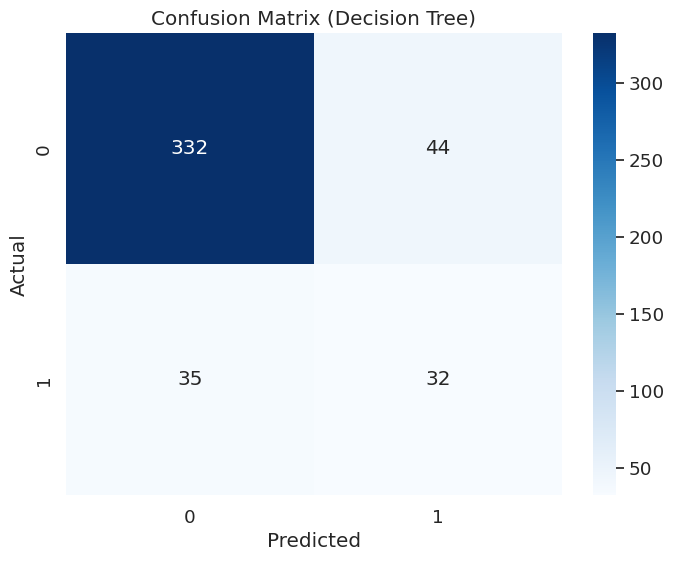

Random Forest Accuracy: 88.04 %
F1 score of Test set: 0.4646464646464647


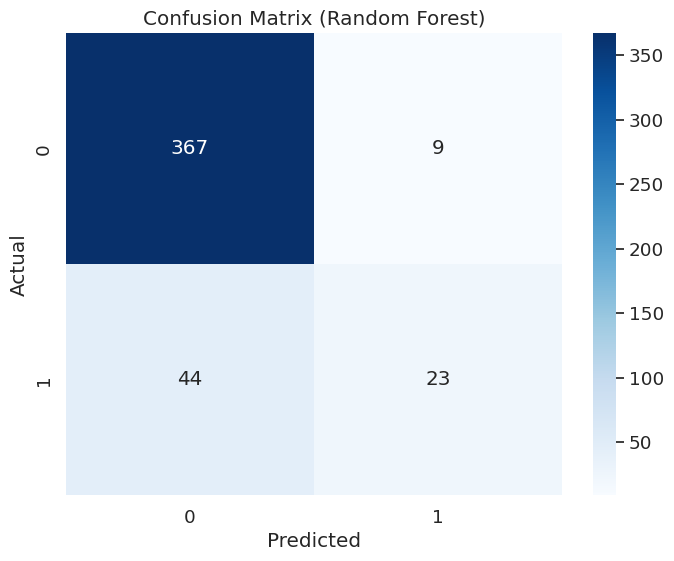

AdaBoost Accuracy: 87.58 %
F1 score of Test set: 0.5132743362831859


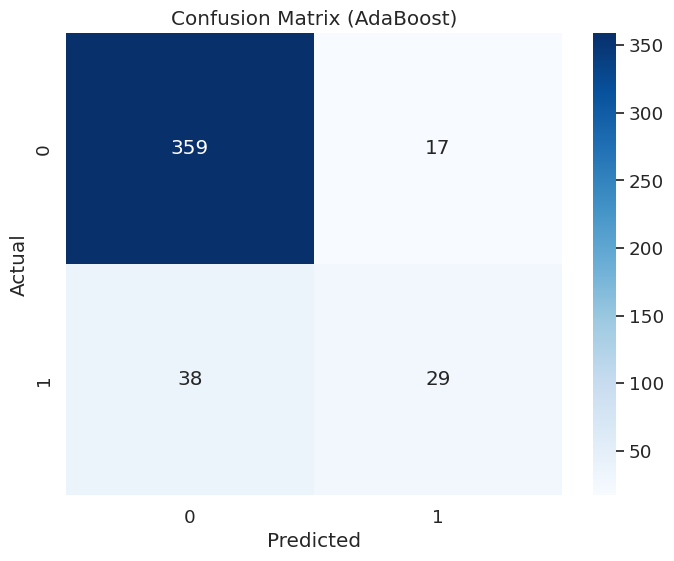

Extra Trees Accuracy: 87.81 %
F1 score of Test set: 0.47058823529411764


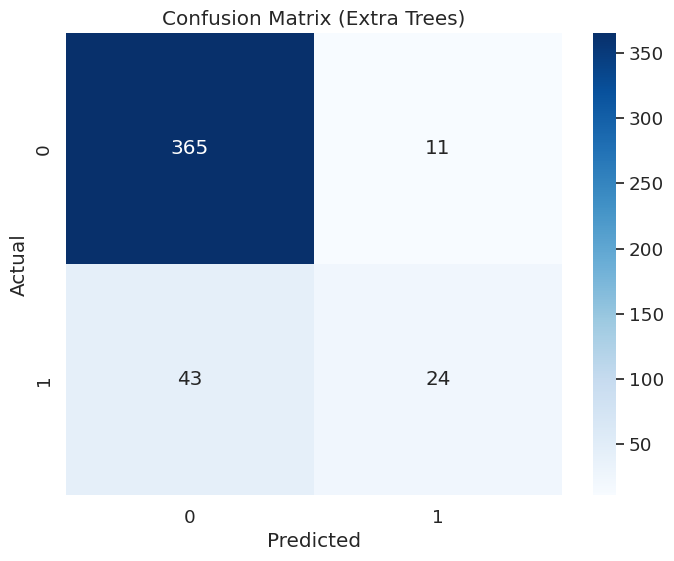

Gradient Boosting Accuracy: 88.04 %
F1 score of Test set: 0.5046728971962616


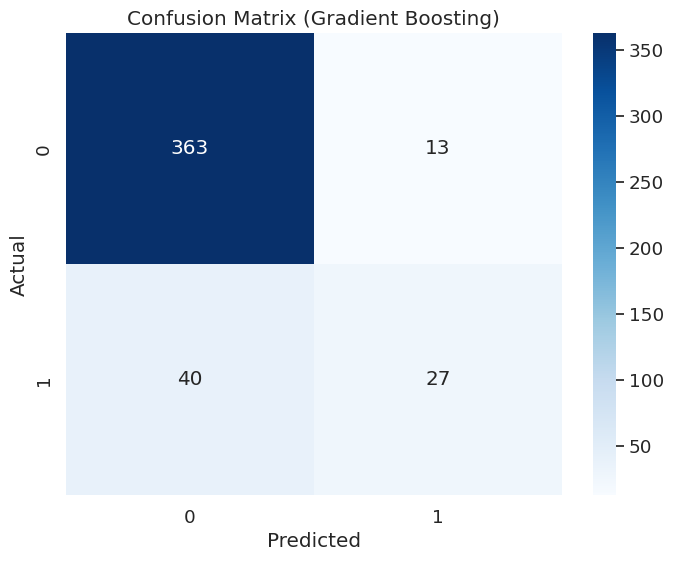

In [66]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=28),
    'Random Forest': RandomForestClassifier(random_state=28),
    'AdaBoost': AdaBoostClassifier(random_state=28),
    'Extra Trees': ExtraTreesClassifier(random_state=28),
    'Gradient Boosting': GradientBoostingClassifier(random_state=28)
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_transformed, np.ravel(y_train))
    conf_matrix, accuracy = evaluate_model(clf, X_test_transformed, y_test)
    print(f"{clf_name} Accuracy:", round(accuracy*100,2), '%')
    print(f"F1 score of Test set: {f1_score(y_test, clf.predict(X_test_transformed))}") # F1 Score
    plot_confusion_matrix(conf_matrix, clf_name)

Without performing any hyperparameter tuning, it looks like the Ada Boost Classifier algorithm seemed to have the best performance with the highest F1 scores among all models.

### With Hyperparameter Tuning ###

#### Decision Tree with Hyperparameter Tuning ####

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 3}
Accuracy for Best Decision Tree: 86.68 %
F1 score of Test set: 0.3655913978494624


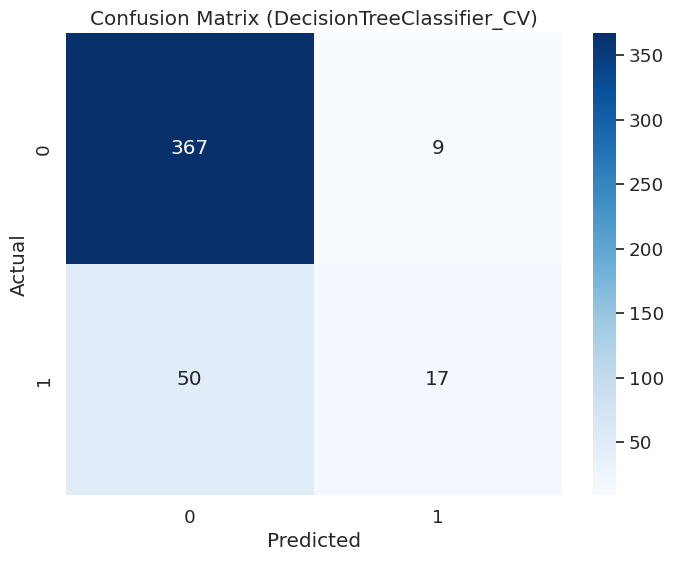

In [63]:
dt_classifier = DecisionTreeClassifier(random_state=28)

param_dist = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

random_search_dt = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_dt.fit(X_train_transformed, np.ravel(y_train))

best_dt_classifier = random_search_dt.best_estimator_

y_pred_dt_best = best_dt_classifier.predict(X_test_transformed)
conf_matrix_dt_best = confusion_matrix(y_test, y_pred_dt_best)
accuracy_dt_best = round(accuracy_score(y_test, y_pred_dt_best)*100,2)

print("Best Hyperparameters:", random_search_dt.best_params_)
print("Accuracy for Best Decision Tree:", accuracy_dt_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_dt_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_dt_best, 'DecisionTreeClassifier_CV')

#### Random Forest with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'log_loss'}
Accuracy for Best Random Forest Classifier: 88.71 %
F1 score of Test set: 0.4680851063829788


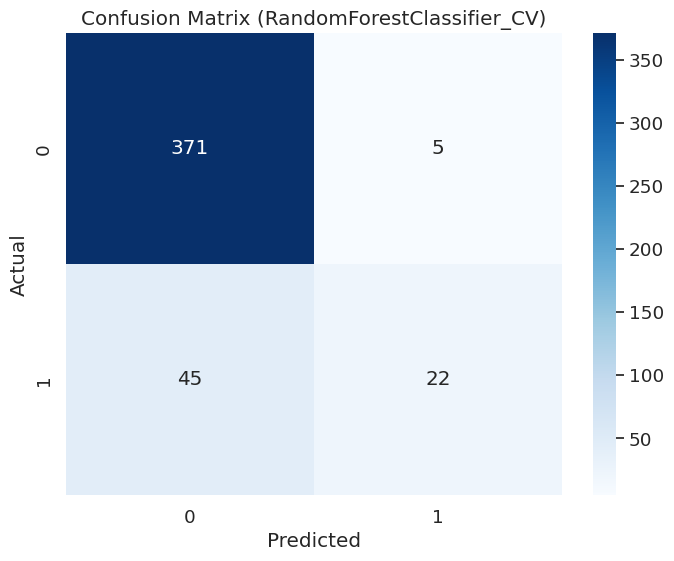

In [64]:
rf_classifier = RandomForestClassifier(random_state=28)

param_dist = {
    'n_estimators': [100,150,200],
    'criterion' : ["gini","entropy","log_loss"],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_rf.fit(X_train_transformed, np.ravel(y_train))

best_rf_classifier = random_search_rf.best_estimator_

y_pred_rf_best = best_rf_classifier.predict(X_test_transformed)
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
accuracy_rf_best = round(accuracy_score(y_test, y_pred_rf_best)*100,2)

print("Best Hyperparameters:", random_search_rf.best_params_)
print("Accuracy for Best Random Forest Classifier:", accuracy_rf_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_rf_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_rf_best, 'RandomForestClassifier_CV')

#### Ada Boost Classifier with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
Accuracy for Best AdaBoost Classifier: 87.36 %
F1 score of Test set: 0.49090909090909085


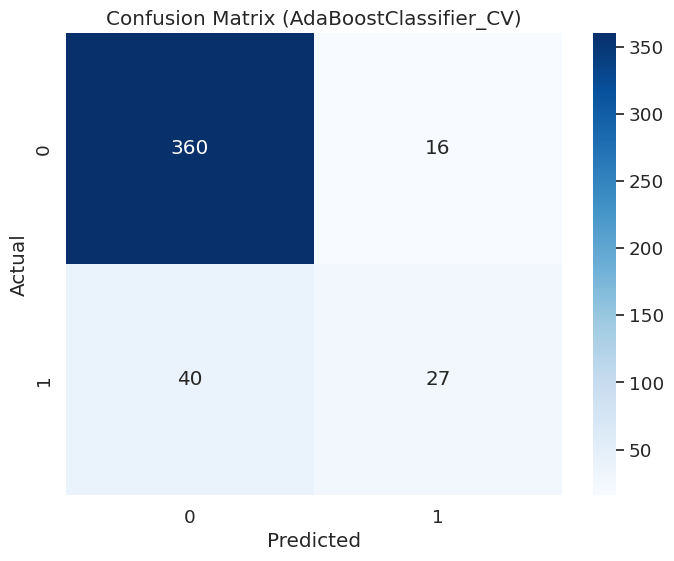

In [67]:
ab_classifier = AdaBoostClassifier(random_state=28)

param_dist = {
    'n_estimators': [50,100,200],
    'learning_rate' : [0.5,1.0],
    'algorithm' : ["SAMME", "SAMME.R"]
}

random_search_ab = RandomizedSearchCV(ab_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_ab.fit(X_train_transformed, np.ravel(y_train))

best_ab_classifier = random_search_ab.best_estimator_

y_pred_ab_best = best_ab_classifier.predict(X_test_transformed)
conf_matrix_ab_best = confusion_matrix(y_test, y_pred_ab_best)
accuracy_ab_best = round(accuracy_score(y_test, y_pred_ab_best)*100,2)

print("Best Hyperparameters:", random_search_ab.best_params_)
print("Accuracy for Best AdaBoost Classifier:", accuracy_ab_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_ab_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_ab_best, 'AdaBoostClassifier_CV')


#### Extra Trees Classifier with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Accuracy for Best Extra Trees Classifier: 88.94 %
F1 score of Test set: 0.5148514851485149


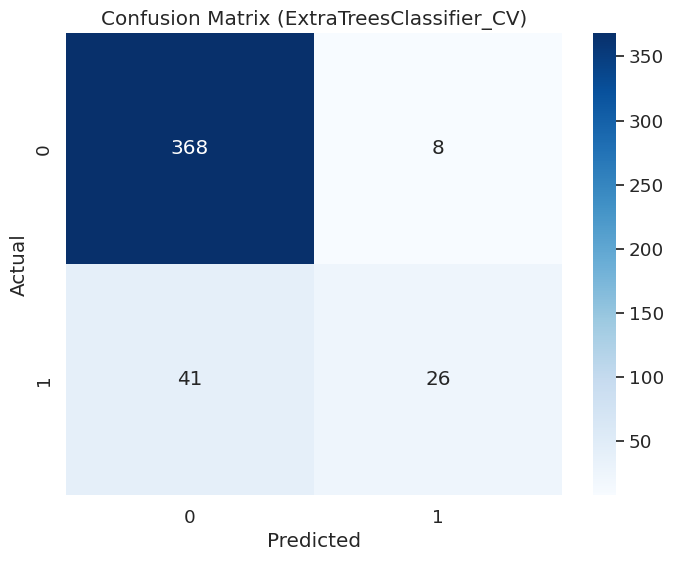

In [68]:
et_classifier = ExtraTreesClassifier(random_state=28)

param_dist = {
    'n_estimators': [100,200],
    'criterion' : ["gini","entropy","log_loss"],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

random_search_et = RandomizedSearchCV(et_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_et.fit(X_train_transformed, np.ravel(y_train))

best_et_classifier = random_search_et.best_estimator_

y_pred_et_best = best_et_classifier.predict(X_test_transformed)
conf_matrix_et_best = confusion_matrix(y_test, y_pred_et_best)
accuracy_et_best = round(accuracy_score(y_test, y_pred_et_best)*100,2)

print("Best Hyperparameters:", random_search_et.best_params_)
print("Accuracy for Best Extra Trees Classifier:", accuracy_et_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_et_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_et_best, 'ExtraTreesClassifier_CV')



#### Gradient Boosting Classifier with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}
Accuracy for Best Gradient Boost Classifier: 87.13 %
F1 score of Test set: 0.5289256198347108


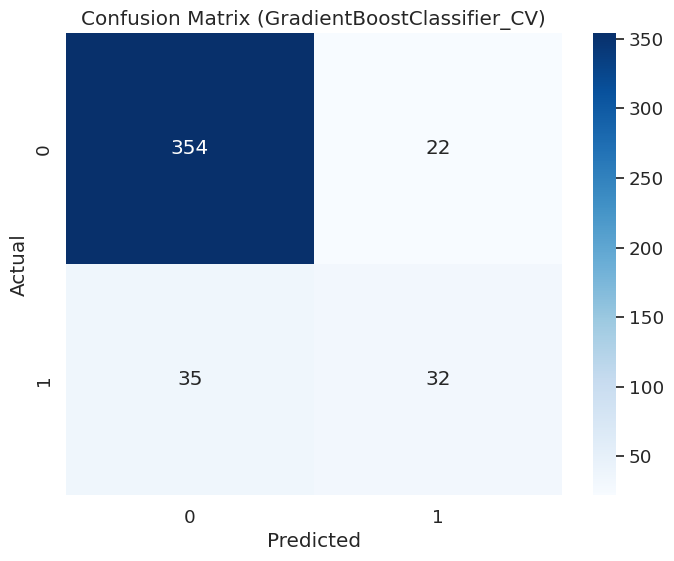

In [69]:
gb_classifier = GradientBoostingClassifier(random_state=28)

param_dist = {
    'loss': ["log_loss", "exponential"],
    'n_estimators': [100,150],
    'criterion' : ["friedman_mse","squared_error"],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate' : [0.5, 1.0]
}

random_search_gb = RandomizedSearchCV(gb_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_gb.fit(X_train_transformed, np.ravel(y_train))

best_gb_classifier = random_search_gb.best_estimator_

y_pred_gb_best = best_gb_classifier.predict(X_test_transformed)
conf_matrix_gb_best = confusion_matrix(y_test, y_pred_gb_best)
accuracy_gb_best =  round(accuracy_score(y_test, y_pred_gb_best)*100,2)

print("Best Hyperparameters:", random_search_gb.best_params_)
print("Accuracy for Best Gradient Boost Classifier:", accuracy_gb_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_gb_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_gb_best, 'GradientBoostClassifier_CV')



## Results Analysis

On comparing the models after hyperparameter tuning, it can be inferred that the **Gradient Boosting Classifier** is the winning model here as it has  the best performance when compared to the other models as it has the best F1 score (highest among all of them).

PS: F1 score is used for determining model performance instead of accuracy score because of the data imbalance

#Appendix#

## Feature Engineering & Data Pre-Processing for Prediction Model ##

In [ ]:
df_copy_pred=df.copy() # Making a new copy of the dataframe

In [ ]:
df_copy_pred.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'year', 'age'],
      dtype='object')

In [ ]:
df_copy_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df_copy_pred.dropna(inplace=True)
df_copy_pred[df_copy_pred['age']>120].index # Removing outlier age
df_copy_pred[df_copy_pred['Income']>200000].index # Removimg outlier Income

Int64Index([2233], dtype='int64')

In [ ]:
df_copy_pred.drop(index=[192,239,339,2233],inplace=True)#index for age>120 rows
df_copy_pred.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2212.000000  2212.000000    2212.000000  2212.000000  2212.000000   
mean    5585.160940  1968.913653   51958.810579     0.441682     0.505877   
std     3247.523735    11.701599   21527.278844     0.536955     0.544253   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35233.500000     0.000000     0.000000   
50%     5454.500000  1970.000000   51371.000000     0.000000     0.000000   
75%     8418.500000  1977.000000   68487.000000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2212.000000  2212.000000  2212.000000      2212.000000   
mean     49.019439   305.287523    26.329566       167.029837   
std      28.943121   337.322940    39.744052       224.254493   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   175.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2212.000000  ...        2212.000000   2212.000000   2212.000000   
mean         37.648734  ...           5.321429      0.073689      0.074141   
std          54.772033  ...           2.425597      0.261323      0.262060   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2212.000000   2212.000000   2212.000000  2212.000000  2212.000000   
mean       0.072785      0.064195      0.013562     0.009042     0.150542   
std        0.259842      0.245156      0.115691     0.094678     0.357683   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

         year          age  
count  2212.0  2212.000000  
mean   2023.0    54.086347  
std       0.0    11.701599  
min    2023.0    27.000000  
25%    2023.0    46.000000  
50%    2023.0    53.000000  
75%    2023.0    64.000000  
max    2023.0    83.000000  

[8 rows x 26 columns]

In [ ]:
df_copy_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

In [ ]:
# Adding a new feature "Accepted_Any_Cmgn" when a customer has accepted any of the past campaigns
df_copy_pred['Accepted_Any_Cmpgn']= np.where((df_copy_pred['AcceptedCmp1'] == 1) | (df_copy_pred['AcceptedCmp2'] == 1) | (df_copy_pred['AcceptedCmp3'] == 1) | (df_copy_pred['AcceptedCmp4'] == 1) | (df_copy_pred['AcceptedCmp5'] == 1), 1, 0)

Add a new feature ***Customer_since*** based on **Dt_Customer** to be number of months since the customer is enrolled with the company

Add a new feature **age** based on **Year_Birth**

In [ ]:
import datetime
df_copy_pred['Dt_Customer'] = pd.to_datetime(df_copy_pred['Dt_Customer'], errors="coerce")
current_date = datetime.datetime.now()
df_copy_pred['Customer_since']=(current_date - df_copy_pred['Dt_Customer']).dt.days / 30.44 # number of month since customer’s enrolment with the company

In [ ]:
df_copy_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

In [ ]:
 df_copy_pred.groupby('Response').count()['ID']

Response
0    1879
1     333
Name: ID, dtype: int64

In [ ]:
df_copy_pred_fnl = df_copy_pred.copy()

Dropping all Extra columns

In [ ]:
df_copy_pred_fnl.drop(labels=['ID','Year_Birth','Dt_Customer','year'],axis=1,inplace=True)

In [ ]:
df_copy_pred_fnl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

### Null Analysis ##

In [ ]:
null_counts = df_copy_pred_fnl.isnull().sum()
print(null_counts)

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
age                    0
Accepted_Any_Cmpgn     0
Customer_since         0
dtype: int64


In [ ]:
mean_income = df_copy_pred_fnl['Income'].mean()
median_income = df_copy_pred_fnl['Income'].median()
df_copy_pred_fnl['Income'].fillna(mean_income, inplace=True)  # or median_income
df_copy_pred_fnl['Income'].isnull().sum()

0

### Check for Data Imbalance

In [ ]:
def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

0    1879
1     333
Name: Response, dtype: int64

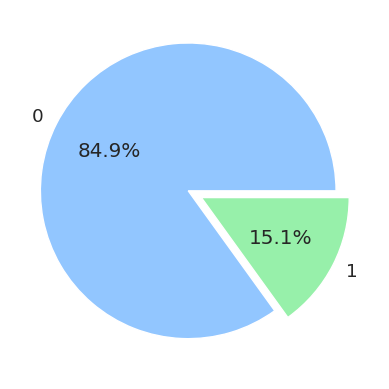

In [ ]:
check_data_balance(df_copy_pred_fnl["Response"])

Upon checking for data imbalance, it could be understood that the data is not a completely balanced set as it contains more observations of people who haven't accepted the last campaign offer vs people who have accepted the last campaign offer

## Creating X and y for Predictive Analysis ##




In [ ]:
#columns_numerical = ['Income','age', 'Recency', 'MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', 'Cust_Tenure']


In [ ]:
#columns_categorical = ['Education','Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Accepted_Any_Cmpgn']

In [ ]:
# Sorting variables by datatypes and splitting them into predictor and target variables

TARGET = ['Response']
columns_predictors = [col for col in df_copy_pred_fnl.columns if col not in TARGET]
#columns_numerical = ['Income','age', 'Recency', 'MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', 'Cust_Tenure']
columns_cat_nde = ['Education','Marital_Status']
columns_cat_dnde = ['Kidhome', 'Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Accepted_Any_Cmpgn']
columns_numerical = [col for col in columns_predictors if col not in columns_cat_nde if col not in columns_cat_dnde if col not in TARGET]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical_need_encoding: {columns_cat_nde}")
print(f"columns_categorical_dont_need_encoding: {columns_cat_dnde}")
print(f"columns_numerical: {columns_numerical}")

TARGET: ['Response']
columns_predictors: ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'age', 'Accepted_Any_Cmpgn', 'Customer_since']
columns_categorical_need_encoding: ['Education', 'Marital_Status']
columns_categorical_dont_need_encoding: ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Accepted_Any_Cmpgn']
columns_numerical: ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age', 'Customer_since']


## Select X and y #

In [ ]:
X = df_copy_pred_fnl[columns_predictors]
y = df_copy_pred_fnl[TARGET]
y.value_counts()

Response
0           1879
1            333
dtype: int64

## Train Test Split ##

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10086, stratify=y) #stratified sampling based on the target to preserve the overall distribution in our train and test datasets
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1769, 26)
X_test.shape: (443, 26)
y_train.shape: (1769, 1)
y_test.shape: (443, 1)


In [ ]:
from IPython.display import display
display(X_train)
display(y_train)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
65    Graduation        Married  25721.0        1         0       75   
1320      Master        Married  81843.0        0         0       13   
373   Graduation         Single  63810.0        0         1       45   
581   Graduation       Together  40689.0        0         1       69   
343          PhD       Together  59292.0        0         1       71   
...          ...            ...      ...      ...       ...      ...   
2048  Graduation         Single  76467.0        1         0       44   
790       Master       Together  62847.0        0         0       45   
1938      Master        Married  34242.0        0         1       25   
237          PhD         Single  79761.0        0         1       32   
26    Graduation        Married  53359.0        1         1        4   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
65           1          3                6                3  ...   
1320       779         86              537               34  ...   
373        977         12              253               16  ...   
581        270          3               27               39  ...   
343        378         14               68               19  ...   
...        ...        ...              ...              ...  ...   
2048       676        161              426              210  ...   
790        521        168              706               80  ...   
1938         8          2                4                0  ...   
237        415          5              124               15  ...   
26         173          4               30                3  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
65                    7             0             0             0   
1320                  3             0             0             0   
373                   8             0             1             0   
581                   8             0             0             0   
343                   3             0             0             0   
...                 ...           ...           ...           ...   
2048                  6             0             0             0   
790                   2             0             0             0   
1938                  5             0             0             0   
237                   3             0             0             0   
26                    7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  age  Accepted_Any_Cmpgn  \
65               0             0         0   52                   0   
1320             0             0         0   63                   0   
373              0             0         0   57                   1   
581              0             0         0   72                   0   
343              0             0         0   73                   0   
...            ...           ...       ...  ...                 ...   
2048             0             0         0   53                   0   
790              0             0         0   78                   0   
1938             0             0         0   64                   0   
237              0             0         0   65                   0   
26               0             0         0   47                   0   

      Customer_since  
65        122.766097  
1320      123.718791  
373       129.040736  
581       124.868594  
343       122.010512  
...              ...  
2048      131.865966  
790       126.905388  
1938      112.713535  
237       124.113009  
26        122.568988  

[1769 rows x 26 columns]

Response
65           1
1320         0
373          0
581          0
343          0
...        ...
2048         1
790          0
1938         0
237          0
26           0

[1769 rows x 1 columns]

## Pre-processing with Pipelines ##

In [ ]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder #specific transformations we want to use in our pipelines

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown="ignore")),
])

pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

pipeline_full = ColumnTransformer([
  ("categorical_nde", pipeline_categorical, columns_cat_nde),
  ("categorical_dnde",'passthrough', columns_cat_dnde),
  ("numerical", pipeline_numerical, columns_numerical)
])


Separate the variables into various buckets namely categorical and numerical and applying ColumnTransformer to merge them.

In [ ]:
pipeline_full

ColumnTransformer(transformers=[('categorical_nde',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education', 'Marital_Status']),
                                ('categorical_dnde', 'passthrough',
                                 ['Kidhome', 'Teenhome', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                                  'Accepted_Any_Cmpgn']),
                                ('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Income', 'Recency', 'MntWines', 'MntFruits',
                                  'MntMeatProducts', 'MntFishProducts',
                                  'MntSweetProducts', 'MntGoldProds',
                                  'NumDealsPurchases', 'NumWebPurchases',
                                  'NumCatalogPurchases', 'NumStorePurchases',
                                  'NumWebVisitsMonth', 'age',
                                  'Customer_since'])])

## Applying the Pipeline ##

In [ ]:
X_train_transformed = pipeline_full.fit_transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (1769, 37)
X_test_transformed.shape: (443, 37)


In [ ]:
pipeline_full.get_feature_names_out()

array(['categorical_nde__Education_2n Cycle',
       'categorical_nde__Education_Basic',
       'categorical_nde__Education_Graduation',
       'categorical_nde__Education_Master',
       'categorical_nde__Education_PhD',
       'categorical_nde__Marital_Status_Absurd',
       'categorical_nde__Marital_Status_Alone',
       'categorical_nde__Marital_Status_Divorced',
       'categorical_nde__Marital_Status_Married',
       'categorical_nde__Marital_Status_Single',
       'categorical_nde__Marital_Status_Together',
       'categorical_nde__Marital_Status_Widow',
       'categorical_nde__Marital_Status_YOLO',
       'categorical_dnde__Kidhome', 'categorical_dnde__Teenhome',
       'categorical_dnde__AcceptedCmp1', 'categorical_dnde__AcceptedCmp2',
       'categorical_dnde__AcceptedCmp3', 'categorical_dnde__AcceptedCmp4',
       'categorical_dnde__AcceptedCmp5', 'categorical_dnde__Complain',
       'categorical_dnde__Accepted_Any_Cmpgn', 'numerical__Income',
       'numerical__Recency', '

In [ ]:
pipeline_full.named_transformers_["categorical_nde"].get_feature_names_out()

array(['Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'], dtype=object)

In [ ]:
pipeline_full.named_transformers_["numerical"].get_feature_names_out()

array(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'age', 'Customer_since'],
      dtype=object)

In [ ]:
print(y_train.columns)

Index(['Response'], dtype='object')


In [ ]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return conf_matrix, accuracy


## PCA  - Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca_red = PCA(n_components=0.95)
df_pca_red = pipeline_full.fit_transform(X)

print(df_pca_red.shape)

(2212, 37)


Applying PCA to achieve reduced dimensions resulted in no reduction signifying
that current list of dimensions are already optimized to run the prediction model

## Feature Selection

In [ ]:
# Importing Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

Using Random Forest Classifier to determine Item Importance

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rfc.fit(X=X_train_transformed, y=np.ravel(y_train))

RandomForestClassifier(max_leaf_nodes=16, n_estimators=50, n_jobs=-1)

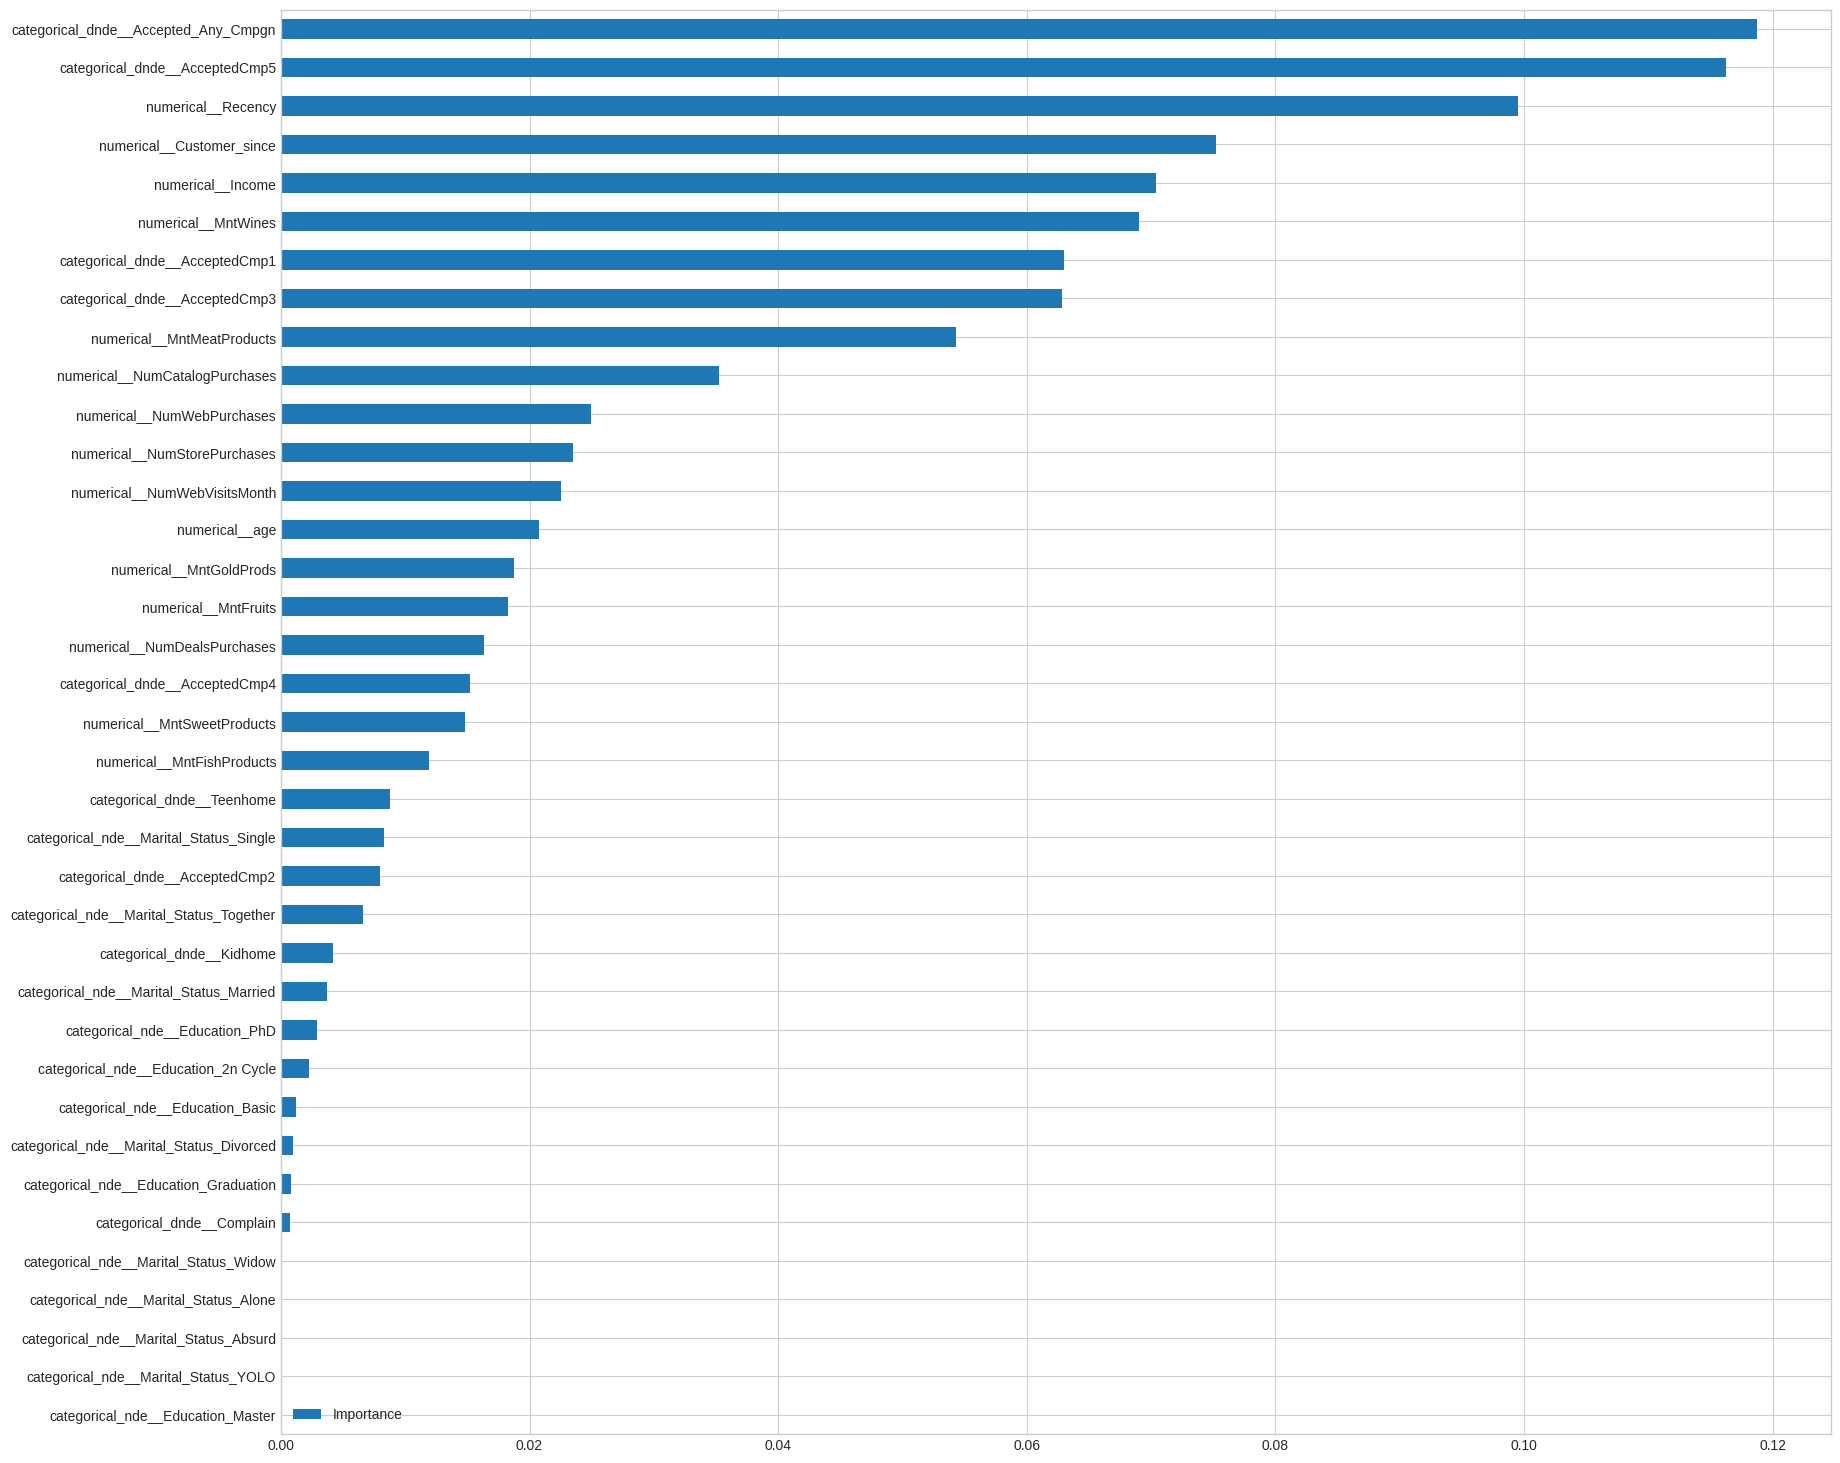

In [ ]:
plt.style.use('seaborn-whitegrid')
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=pipeline_full.get_feature_names_out(), columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20, len(importance)/2));

## Analysis of Different Models ##

### Without Hyperparameter Tuning ###

Decision Tree Accuracy: 0.837471783295711
F1 score of Test set: 0.47058823529411764


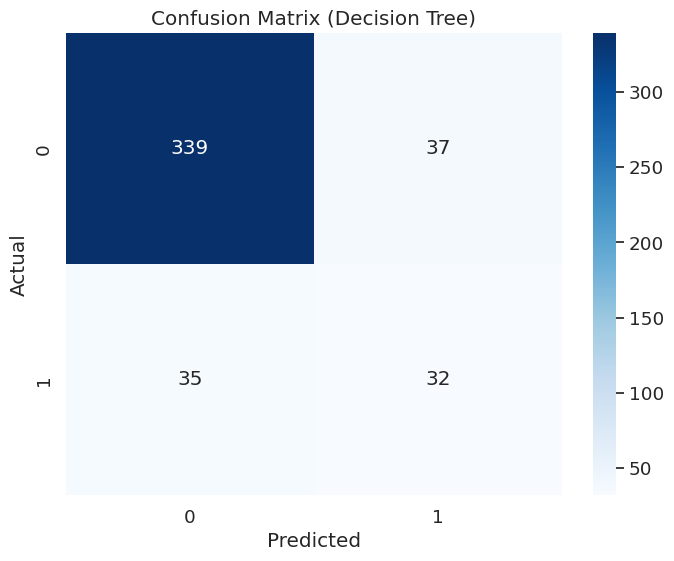

Random Forest Accuracy: 0.8848758465011287
F1 score of Test set: 0.5048543689320389


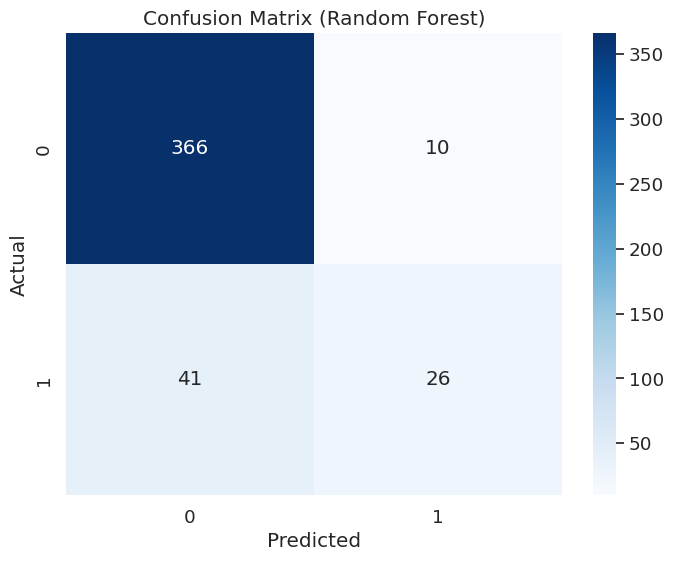

AdaBoost Accuracy: 0.8758465011286681
F1 score of Test set: 0.5378151260504201


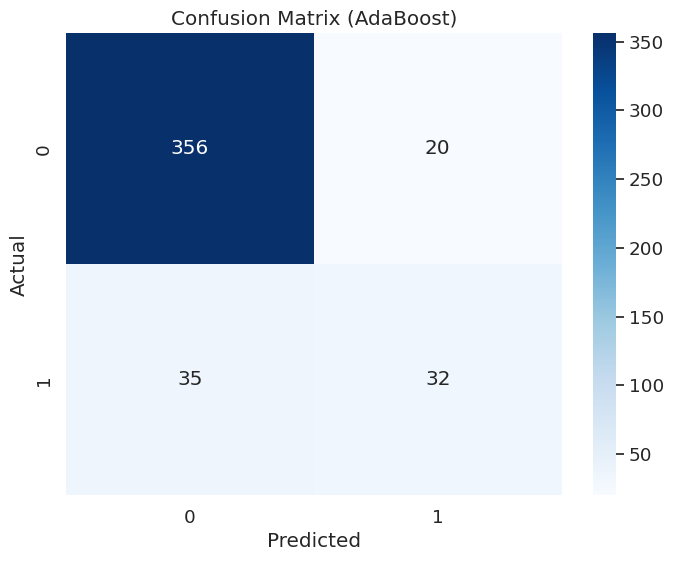

Extra Trees Accuracy: 0.8848758465011287
F1 score of Test set: 0.5142857142857143


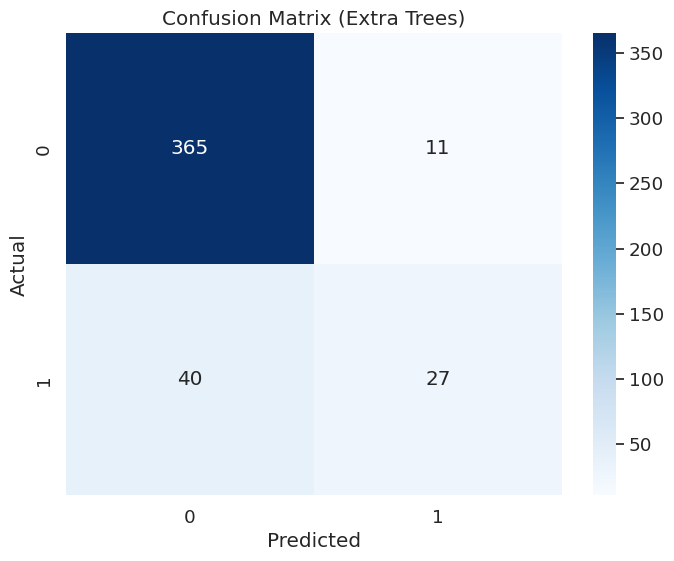

Gradient Boosting Accuracy: 0.8781038374717833
F1 score of Test set: 0.509090909090909


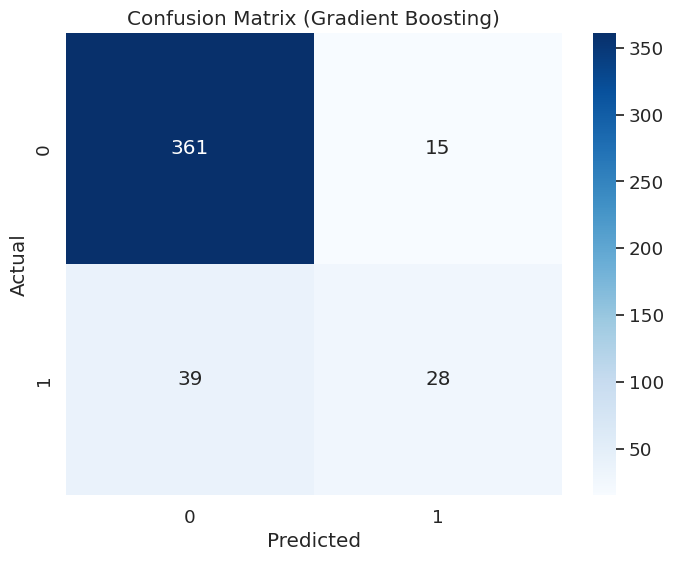

In [ ]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=28),
    'Random Forest': RandomForestClassifier(random_state=28),
    'AdaBoost': AdaBoostClassifier(random_state=28),
    'Extra Trees': ExtraTreesClassifier(random_state=28),
    'Gradient Boosting': GradientBoostingClassifier(random_state=28)
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_transformed, np.ravel(y_train))
    conf_matrix, accuracy = evaluate_model(clf, X_test_transformed, y_test)
    print(f"{clf_name} Accuracy:", accuracy)
    print(f"F1 score of Test set: {f1_score(y_test, clf.predict(X_test_transformed))}") # F1 Score
    plot_confusion_matrix(conf_matrix, clf_name)

Without performing any hyperparameter tuning, it looks like the Ada Boost Classifier algorithm seemed to have the best performance with the highest F1 scores among all models.

### With Hyperparameter Tuning ###

#### Decision Tree with Hyperparameter Tuning ####

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7}
Accuracy for Best Decision Tree: 85.33 %
F1 score of Test set: 0.4347826086956522


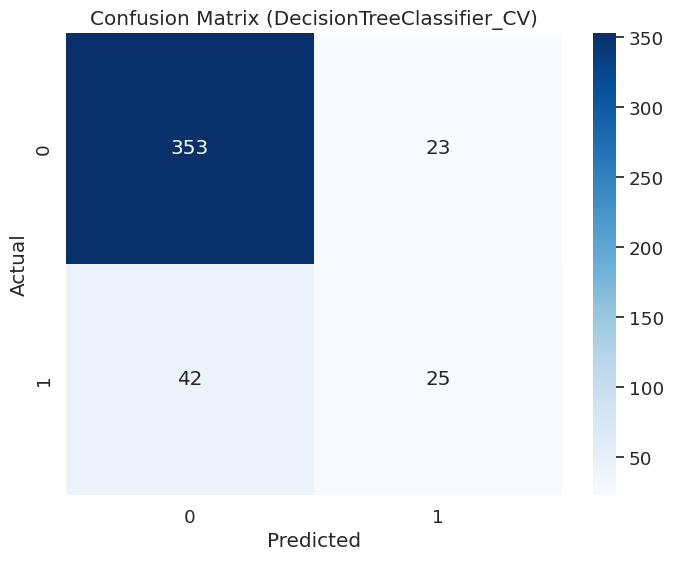

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=28)

param_dist = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

random_search_dt = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_dt.fit(X_train_transformed, np.ravel(y_train))

best_dt_classifier = random_search_dt.best_estimator_

y_pred_dt_best = best_dt_classifier.predict(X_test_transformed)
conf_matrix_dt_best = confusion_matrix(y_test, y_pred_dt_best)
accuracy_dt_best = round(accuracy_score(y_test, y_pred_dt_best)*100,2)

print("Best Hyperparameters:", random_search_dt.best_params_)
print("Accuracy for Best Decision Tree:", accuracy_dt_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_dt_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_dt_best, 'DecisionTreeClassifier_CV')

#### Random Forest with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'log_loss'}
Accuracy for Best Random Forest Classifier: 88.26 %
F1 score of Test set: 0.4693877551020407


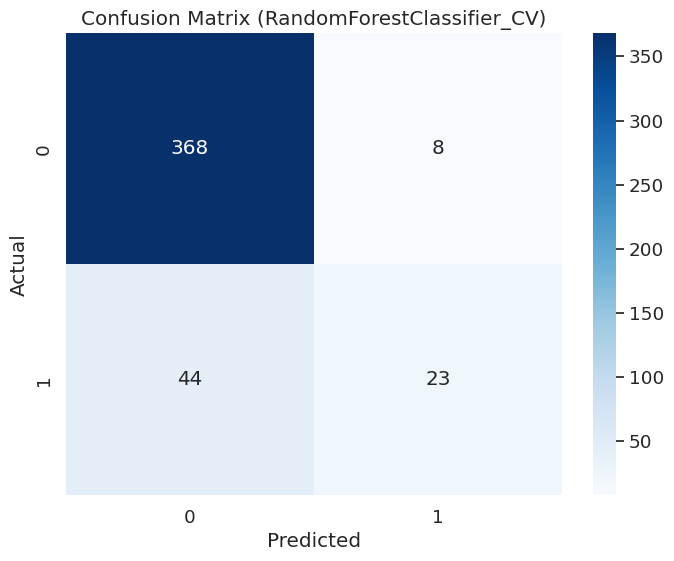

In [ ]:
rf_classifier = RandomForestClassifier(random_state=28)

param_dist = {
    'n_estimators': [100,150,200],
    'criterion' : ["gini","entropy","log_loss"],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_rf.fit(X_train_transformed, np.ravel(y_train))

best_rf_classifier = random_search_rf.best_estimator_

y_pred_rf_best = best_rf_classifier.predict(X_test_transformed)
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
accuracy_rf_best = round(accuracy_score(y_test, y_pred_rf_best)*100,2)

print("Best Hyperparameters:", random_search_rf.best_params_)
print("Accuracy for Best Random Forest Classifier:", accuracy_rf_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_rf_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_rf_best, 'RandomForestClassifier_CV')

#### Ada Boost Classifier with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
Accuracy for Best AdaBoost Classifier: 86.91 %
F1 score of Test set: 0.4912280701754387


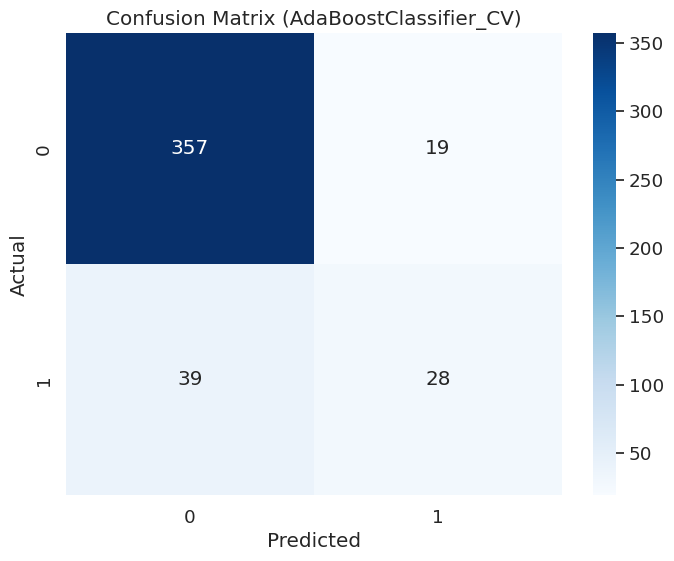

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=28)

param_dist = {
    'n_estimators': [50,100,200],
    'learning_rate' : [0.5,1.0],
    'algorithm' : ["SAMME", "SAMME.R"]
}

random_search_ab = RandomizedSearchCV(ab_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_ab.fit(X_train_transformed, np.ravel(y_train))

best_ab_classifier = random_search_ab.best_estimator_

y_pred_ab_best = best_ab_classifier.predict(X_test_transformed)
conf_matrix_ab_best = confusion_matrix(y_test, y_pred_ab_best)
accuracy_ab_best = round(accuracy_score(y_test, y_pred_ab_best)*100,2)

print("Best Hyperparameters:", random_search_ab.best_params_)
print("Accuracy for Best AdaBoost Classifier:", accuracy_ab_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_ab_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_ab_best, 'AdaBoostClassifier_CV')


#### Extra Trees Classifier with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 9, 'criterion': 'entropy'}
Accuracy for Best Extra Trees Classifier: 87.81 %
F1 score of Test set: 0.42553191489361697


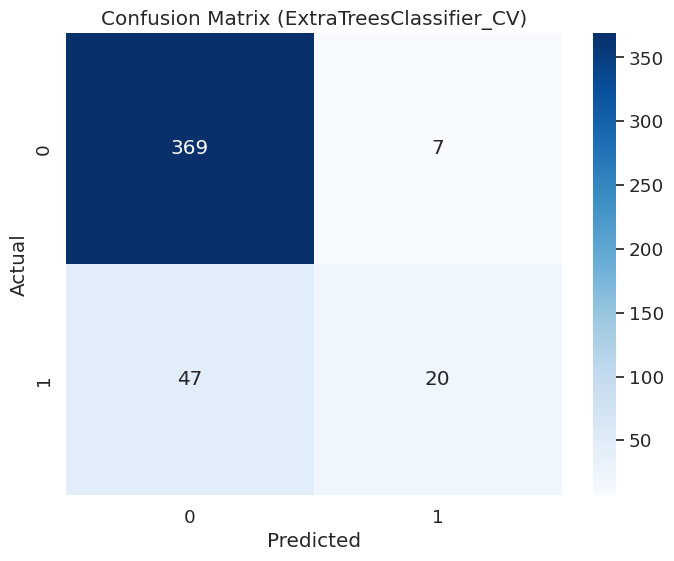

In [ ]:
et_classifier = ExtraTreesClassifier(random_state=28)

param_dist = {
    'n_estimators': [100,200],
    'criterion' : ["gini","entropy","log_loss"],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

random_search_et = RandomizedSearchCV(et_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_et.fit(X_train_transformed, np.ravel(y_train))

best_et_classifier = random_search_et.best_estimator_

y_pred_et_best = best_et_classifier.predict(X_test_transformed)
conf_matrix_et_best = confusion_matrix(y_test, y_pred_et_best)
accuracy_et_best = round(accuracy_score(y_test, y_pred_et_best)*100,2)

print("Best Hyperparameters:", random_search_et.best_params_)
print("Accuracy for Best Extra Trees Classifier:", accuracy_et_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_et_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_et_best, 'ExtraTreesClassifier_CV')



#### Gradient Boosting Classifier with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}
Accuracy for Best Gradient Boost Classifier: 86.91 %
F1 score of Test set: 0.5166666666666667


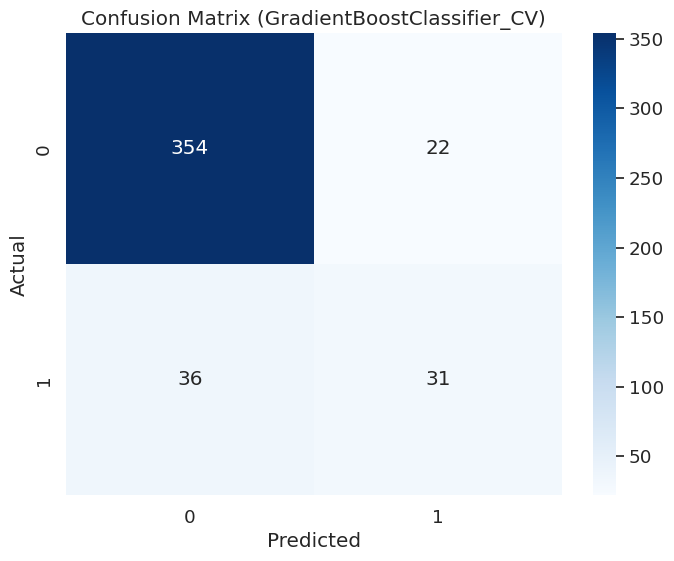

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=28)

param_dist = {
    'loss': ["log_loss", "exponential"],
    'n_estimators': [100,150],
    'criterion' : ["friedman_mse","squared_error"],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate' : [0.5, 1.0]
}

random_search_gb = RandomizedSearchCV(gb_classifier, param_distributions=param_dist, n_iter=10, random_state=28)

random_search_gb.fit(X_train_transformed, np.ravel(y_train))

best_gb_classifier = random_search_gb.best_estimator_

y_pred_gb_best = best_gb_classifier.predict(X_test_transformed)
conf_matrix_gb_best = confusion_matrix(y_test, y_pred_gb_best)
accuracy_gb_best =  round(accuracy_score(y_test, y_pred_gb_best)*100,2)

print("Best Hyperparameters:", random_search_gb.best_params_)
print("Accuracy for Best Gradient Boost Classifier:", accuracy_gb_best, '%')
print(f"F1 score of Test set: {f1_score(y_test, y_pred_gb_best)}") # F1 Score

plot_confusion_matrix(conf_matrix_gb_best, 'GradientBoostClassifier_CV')

